# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore') # 경고 메세지 무시

### 데이터 셋 읽어오기

In [2]:
df_train = pd.read_csv("../data/train.csv") # 학습용 데이터
df_test = pd.read_csv("../data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [3]:
df_train.tail() # 학습용 데이터 살펴보기

bant_submit          customer_country business_unit  \
59294         1.00           /Sląskie/Poland            AS   
59295         0.75      /Bogotá DC /Colombia            AS   
59296         0.75               /Pisco/Peru            AS   
59297         1.00  /santa cruz bolivia/Peru            AS   
59298         0.75             /paris/France      Solution   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
59294                   NaN         33747           End Customer         SMB   
59295                  0.04         35420  Specifier/ Influencer  Enterprise   
59296                  0.04         19249  Specifier/ Influencer  Enterprise   
59297                  0.04         40327                    NaN  Enterprise   
59298                   NaN         30268                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
59294                      NaN               NaN               NaN  ...   
59295                      NaN               NaN               NaN  ...   
59296                      NaN               NaN               NaN  ...   
59297                      NaN               NaN               NaN  ...   
59298                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
59294               LGEPL  3 months ~ 6 months        0       0   
59295               LGECB    9 months ~ 1 year        0       0   
59296               LGEPR   less than 3 months        0       0   
59297               LGEPR     more than a year        0       0   
59298               LGEKR   less than 3 months        0       0   

      ver_win_rate_x ver_win_ratio_per_bu    business_area business_subarea  \
59294       0.000026             0.028777  public facility           Others   
59295       0.000026             0.028777  public facility              NaN   
59296       0.000026             0.028777  public facility              NaN   
59297       0.000026             0.028777  public facility              NaN   
59298       0.000026                  NaN  public facility              NaN   

      lead_owner is_converted  
59294        694        False  
59295         39        False  
59296        125        False  
59297        134        False  
59298        441        False  

[5 rows x 29 columns]

타겟변수(is_converted)를 포함하여 29개의 칼럼으로 이루어져 있고  
59298개의 데이터를 가짐을 확인할수 있다.

In [4]:
df_test.tail() # 테스트 데이터 살펴보기

id  bant_submit            customer_country business_unit  \
5266  13855         0.50           /São Paulo/Brazil            AS   
5267   7979         0.25  General /  / United States            IT   
5268  12887         0.75      / OURO BRANCO / Brazil            AS   
5269  17530         0.00                /  / Germany            IT   
5270   4330         0.25           / Ongole  / India            AS   

      com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
5266                   NaN         40292                    NaN  Enterprise   
5267                   NaN         47466                    NaN  Enterprise   
5268                   NaN         46227  Specifier/ Influencer  Enterprise   
5269                   NaN         45667           End Customer         SMB   
5270                   NaN         23646           End Customer  Enterprise   

      historical_existing_cnt  id_strategic_ver  ...  response_corporate  \
5266                     10.0               NaN  ...               LGESP   
5267                      0.0               NaN  ...               LGEUS   
5268                      NaN               NaN  ...               LGESP   
5269                      NaN               NaN  ...               LGEDG   
5270                      NaN               NaN  ...               LGEIL   

       expected_timeline ver_cus  ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
5266                 NaN       0        0            NaN                  NaN   
5267                 NaN       0        0            NaN                  NaN   
5268  less than 3 months       0        0            NaN                  NaN   
5269                 NaN       0        0            NaN                  NaN   
5270                 NaN       0        0            NaN                  NaN   

     business_area business_subarea lead_owner is_converted  
5266           NaN              NaN         97        False  
5267           NaN              NaN        438        False  
5268           NaN              NaN         97         True  
5269           NaN              NaN        429        False  
5270           NaN              NaN          4         True  

[5 rows x 30 columns]

테스트 데이터의 경우 id 칼럼이 추가되는것을 확인할수 있다.

훈련용 데이터에 대해서 가지고 있는 정보를 확인하면 다음과 같다.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

### 결측치 확인

In [6]:
df_train.isnull().sum() / df_train.shape[0]

bant_submit                0.000000
customer_country           0.016560
business_unit              0.000000
com_reg_ver_win_rate       0.754330
customer_idx               0.000000
customer_type              0.741345
enterprise                 0.000000
historical_existing_cnt    0.768023
id_strategic_ver           0.941921
it_strategic_ver           0.981096
idit_strategic_ver         0.923017
customer_job               0.315908
lead_desc_length           0.000000
inquiry_type               0.015869
product_category           0.326717
product_subcategory        0.844264
product_modelname          0.844365
customer_country.1         0.016560
customer_position          0.000000
response_corporate         0.000000
expected_timeline          0.520464
ver_cus                    0.000000
ver_pro                    0.000000
ver_win_rate_x             0.689421
ver_win_ratio_per_bu       0.741918
business_area              0.689421
business_subarea           0.906811
lead_owner                 0

결측치를 포함하고 있는 변수들이 있음을 확인할수 있다.

### 이상치 확인

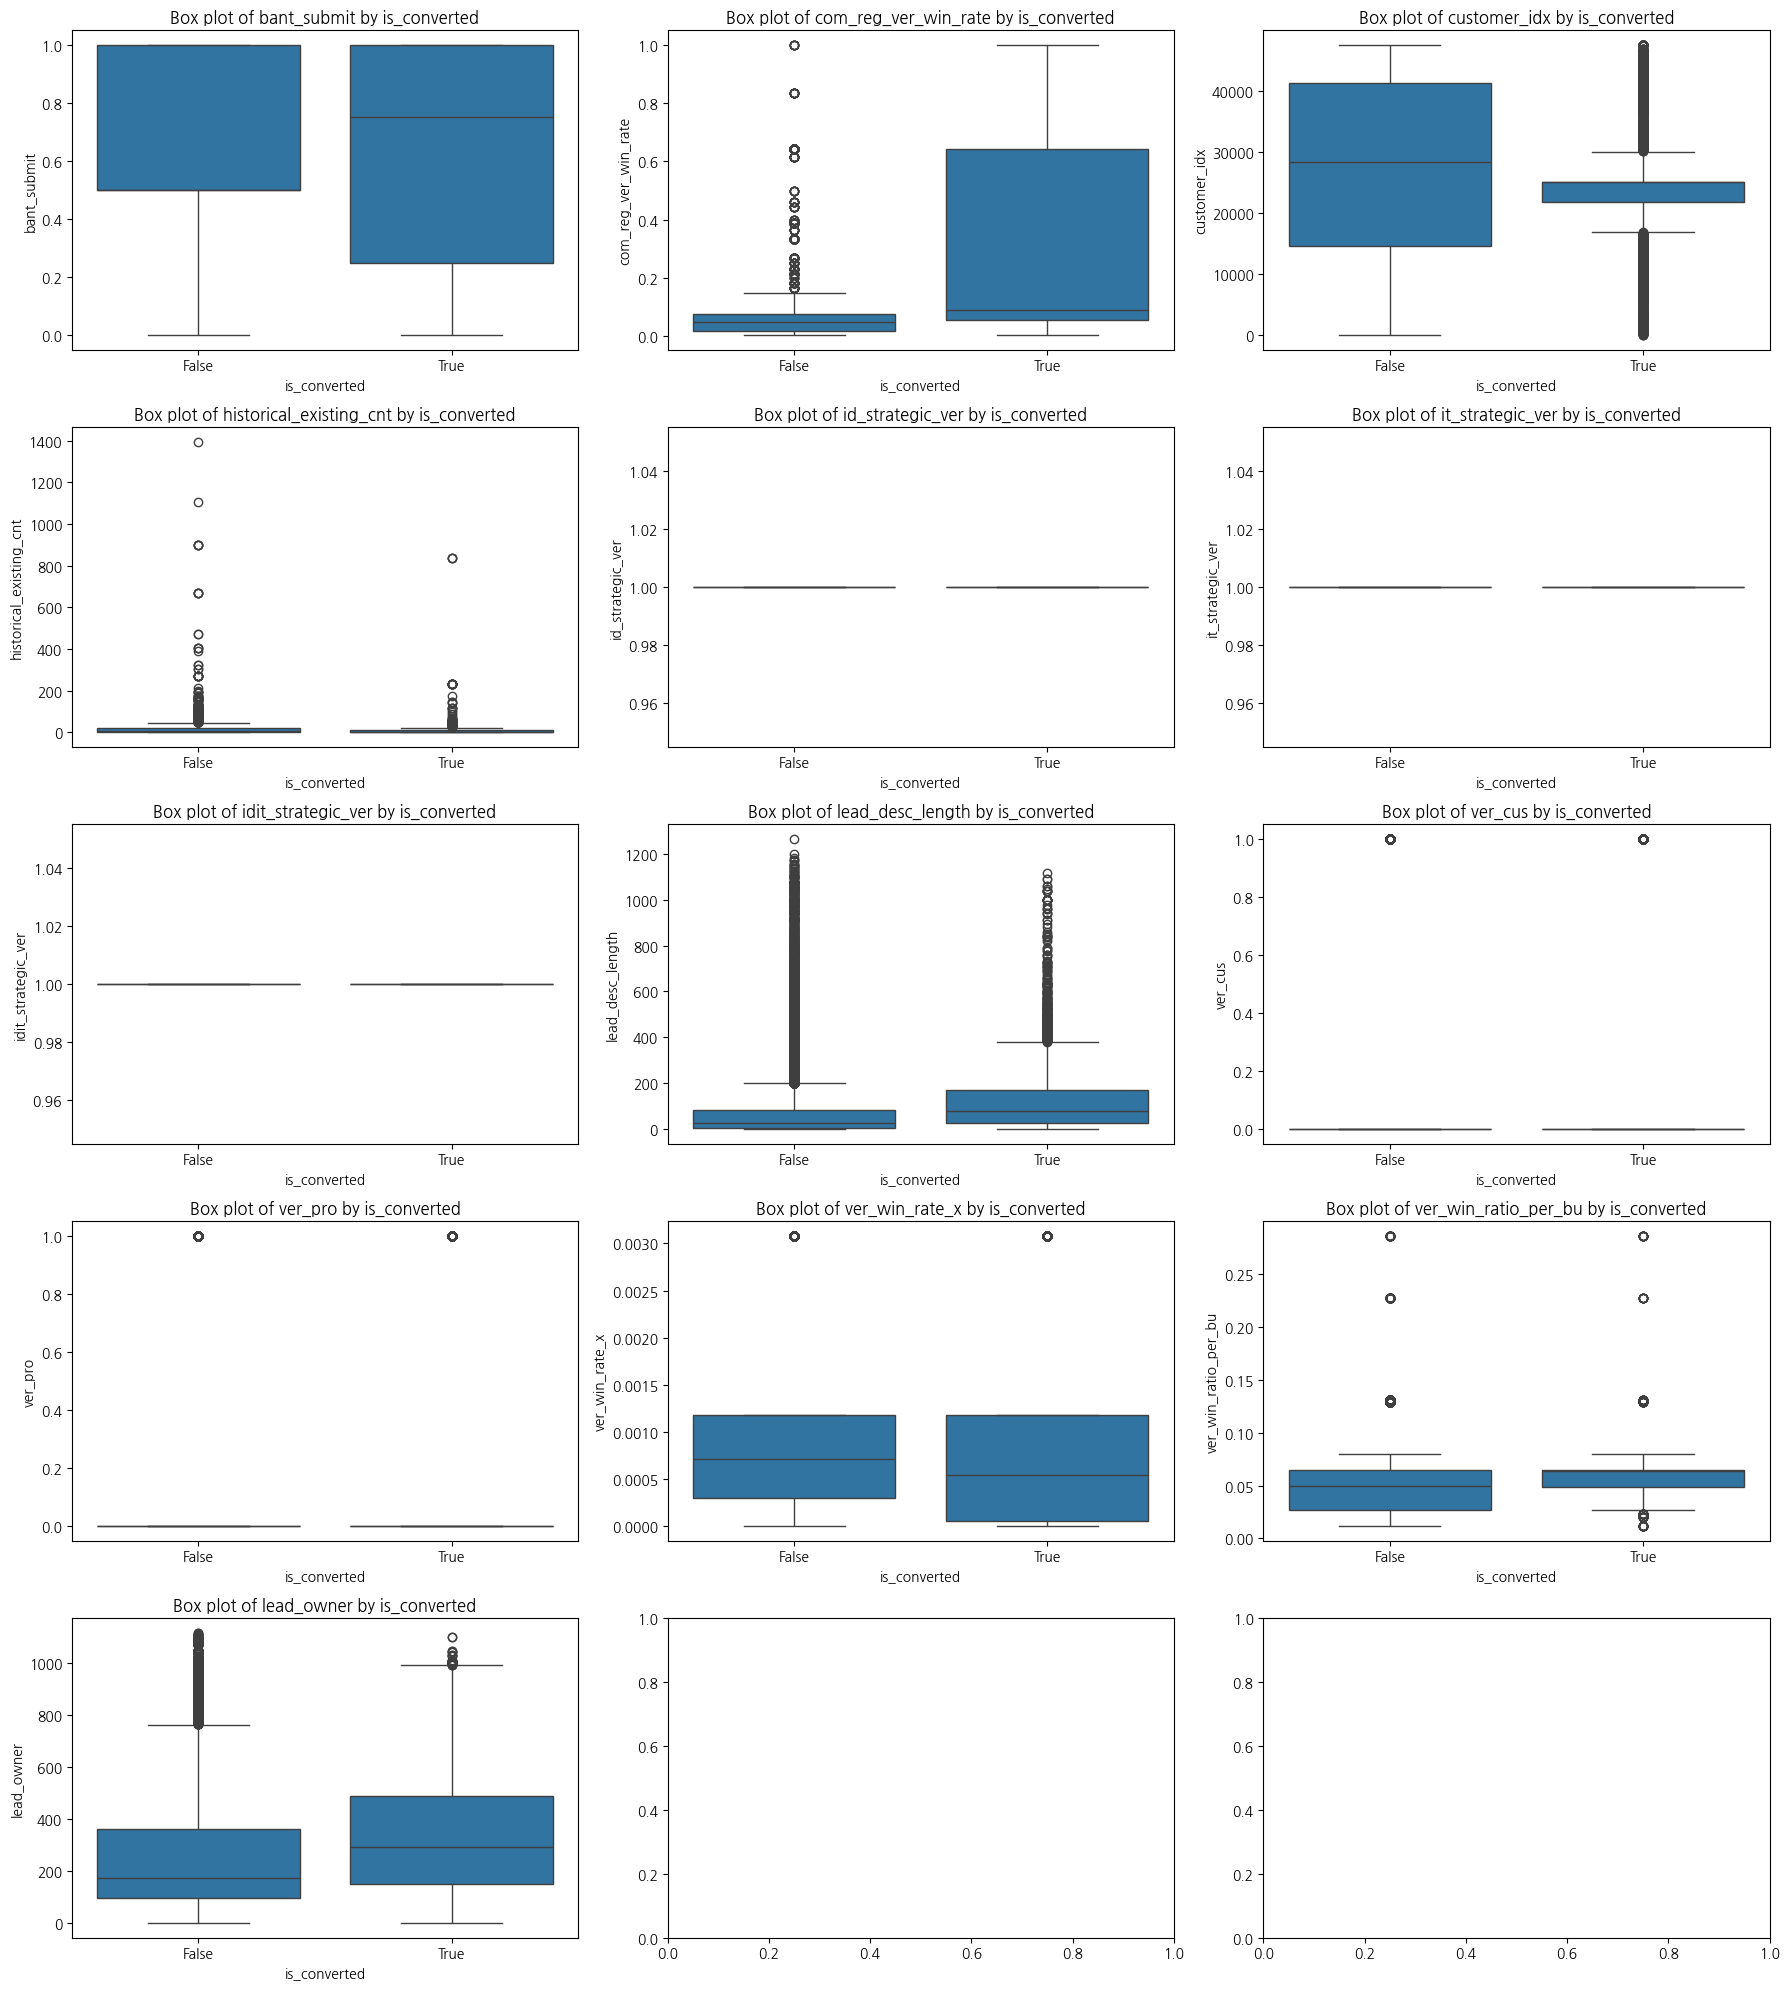

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 변수의 개수에 따라 적절한 행과 열의 개수 설정
n = len(numeric_vars)
ncols = 3  # 열의 개수를 설정
nrows = n // ncols if n % ncols == 0 else n // ncols + 1  # 행의 개수 계산

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))

for i, var in enumerate(numeric_vars):
    r = i // ncols
    c = i % ncols
    sns.boxplot(x='is_converted', y=var, data=df_train, ax=axs[r, c])
    axs[r, c].set_title('Box plot of ' + var + ' by is_converted')

plt.tight_layout()
plt.show()


## 2. 데이터 전처리

### 각 변수별 확인

일단은 크게 처리할만한 부분만 처리하면서 진행해보았음

#### 1. bant_submit

MQL 구성 요소들 중  
[1] Budget(예산)  
[2] Title(고객의 직책/직급)  
[3] Needs(요구사항)  
[4] Timeline(희망 납기일)  
4가지 항목에 대해서 작성된 값의 비율

In [8]:
df_train['bant_submit'].value_counts()

bant_submit
0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: count, dtype: int64

결측지 확인

In [9]:
print(df_train['bant_submit'].isnull().sum())

0


#### 2. customer_country

고객의 국적

In [10]:
df_train['customer_country'].value_counts()

customer_country
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64

In [11]:
def process_customer_country_tokenized_1(df):
    for i, entry in enumerate(df["customer_country"]):
        if isinstance(entry, str):
            tokens = [token.strip() for token in entry.split('/') if token.strip() != '']
            if tokens:
                df.at[i, "customer_country"] = tokens[-1]
            else:
                df.at[i, "customer_country"] = np.nan
        else:
            df.at[i, "customer_country"] = np.nan
    return df

def process_customer_country_tokenized_2(df):
    for i, entry in enumerate(df["customer_country"]):
        if isinstance(entry, str):
            tokens = [token.strip() for token in entry.split(',') if token.strip() != '']
            if tokens:
                df.at[i, "customer_country"] = tokens[-1]
            else:
                df.at[i, "customer_country"] = np.nan
        else:
            df.at[i, "customer_country"] = np.nan
    return df

In [12]:
df_train = process_customer_country_tokenized_1(df_train)
df_train = process_customer_country_tokenized_2(df_train)

df_test = process_customer_country_tokenized_1(df_test)
df_test = process_customer_country_tokenized_2(df_test)

In [13]:
df_test['customer_country'].value_counts()

customer_country
Brazil           1045
India             906
United States     769
Philippines       289
Peru              211
                 ... 
Kimberly            1
CO                  1
Kent                1
Jamaica             1
Birmingham          1
Name: count, Length: 149, dtype: int64

일단은 적은갯수에 대해서 따로 잘라내는 작업은 주석처리

In [14]:
# 'customer_country'의 빈도 계산
counts_train = df_train['customer_country'].value_counts()
counts_test = df_test['customer_country'].value_counts()

# 빈도가 2이하인 국가를 찾음
single_occurrences = counts_train[counts_train <= 2].index
single_occurrences = counts_test[counts_test <= 2].index

# 빈도가 2회 이하인 국가를 'Unknown'으로 설정
df_train.loc[df_train['customer_country'].isin(single_occurrences), 'customer_country'] = 'Unknown'
df_test.loc[df_test['customer_country'].isin(single_occurrences), 'customer_country'] = 'Unknown'


In [15]:
df_test['customer_country'].value_counts()

customer_country
Brazil                1045
India                  906
United States          769
Philippines            289
Peru                   211
Mexico                 180
Corporate              135
Colombia               127
Italy                  120
U.A.E                  120
Unknown                111
Chile                  108
Saudi Arabia           102
Indonesia               95
Egypt                   95
Vietnam                 69
Germany                 67
Australia               66
Argentina               65
Türkiye                 51
Hong Kong               48
United Kingdom          44
Poland                  42
Singapore               41
Thailand                38
Panama                  29
Serbia                  20
Greece                  19
South Africa            19
Canada                  17
France                  16
Oman                    16
Spain                   15
Ecuador                 14
UNITED STATES           13
Hungary                 13
Venezuela  

In [16]:
print(df_train['customer_country'].isnull().sum())

1651


In [17]:
df_train['customer_country'] = df_train['customer_country'].fillna('Unknown')
df_test['customer_country'] = df_test['customer_country'].fillna('Unknown')

In [18]:
print(df_train['customer_country'].isnull().sum())

0


#### 3. business_unit

MQL 요청 상품에 대응되는 사업부

In [19]:
df_train['business_unit'].value_counts()

business_unit
ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: count, dtype: int64

In [20]:
df_test['business_unit'].value_counts()

business_unit
AS    2410
ID    2342
IT     519
Name: count, dtype: int64

In [21]:
cm_data = df_train[df_train['business_unit'] == 'CM']
print(cm_data)

       bant_submit customer_country business_unit  com_reg_ver_win_rate  \
52519          0.5           Brazil            CM                   NaN   
52520          0.5           Brazil            CM                   NaN   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
52519         24728           NaN  Enterprise                      NaN   
52520         24728           NaN  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
52519               NaN               NaN  ...               LGESP   
52520               NaN               NaN  ...               LGESP   

      expected_timeline  ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
52519               NaN        0       0            NaN                  NaN   
52520               NaN        0       0            NaN                  NaN   

      business_area business_subarea lead_owner is_converted  
52519           NaN              NaN

business_unit의 값아 CM 데이터를 제거하기에는 타겟변수(is_converted)에서 모두 False라는 값을 도출해 냄과 동시에  
다른 변수에서 NaN 값으로 대부분 채워져있는것을 보면 CM일수록 is_converted일 가능성이 높다고 판단  
따라서 drop하지않고 그대로 유지(물론 test 데이터에는 CM값이 있지는 않음)

In [22]:
print(df_train['business_unit'].isnull().sum())

0


#### 4. com_reg_ver_win_rate

[1] Vertical Level 1  
[2] business unit  
[3] region  
3가지 값을 기준으로 oppty 비율을 계산

In [23]:
df_train['com_reg_ver_win_rate'].value_counts()

com_reg_ver_win_rate
0.074949    1130
0.003937     803
0.073248     791
0.642857     782
0.003788     713
            ... 
0.363636      13
0.444444      12
0.400000      12
1.000000      10
0.200000       5
Name: count, Length: 80, dtype: int64

In [24]:
df_train['com_reg_ver_win_rate'].value_counts().sum()

14568

결측치 갯수 확인

In [25]:
print(df_train['com_reg_ver_win_rate'].isnull().sum())

44731


결측치에 대해서 값을 계산해서 넣어줄수 있으면 좋음

business_area’, ‘business_unit’,'customer_country’ 각각이 [1],[2],[3]에 해당한다고 추측정도만 한 상태

유의미함을 찾지 못함

랜포 회귀모형을 이용한 값 예측 및 결측값 대체
(개별변수 처리 작업이후 라벨인코딩 진행후에 예측값으로 결측치 대체)

In [26]:
df_test['com_reg_ver_win_rate'].value_counts()

com_reg_ver_win_rate
0.044643    175
0.032787    173
0.074949    169
0.073248    125
0.047619     70
           ... 
0.147059      2
0.086957      2
0.363636      2
0.444444      1
0.500000      1
Name: count, Length: 77, dtype: int64

In [27]:
print(df_train['com_reg_ver_win_rate'].isnull().sum())

44731


#### 5. customer_idx

고객의 회사명

In [28]:
df_train['customer_idx'].value_counts()

customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
         ... 
39487       1
41241       1
39422       1
22515       1
30268       1
Name: count, Length: 35112, dtype: int64

In [29]:
print(df_train['customer_idx'].isnull().sum())

0


#### 6. customer_type

고객 유형

In [30]:
df_train['customer_type'].value_counts()

customer_type
End-Customer                    6647
End Customer                    3996
Specifier/ Influencer           2525
Channel Partner                 1368
Service Partner                  349
Solution Eco-Partner             146
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         17
Technician                        16
Consultant                        15
Other                             10
Home Owner                        10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Architect/Consultant               5
Homeowner                          5
Reseller                           5
Installer                          5
Interior Designer                  5
Distributor                        4
Others                  

In [31]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'Others': 'Other',
    'Etc.': 'Other',
    'Software / Solution Provider': 'Software/Solution Provider',
    'Specifier/ Influencer': 'Specifier/Influencer',
    'Specifier / Influencer': 'Specifier/Influencer',
    'Distributor': 'Dealer/Distributor',
    'Homeowner': 'Home Owner',
    'Manager / Director' : 'Manager/Director',
    'Commercial end-user': 'End-user',
    'End Customer': 'End-Customer',
    'Consultant': 'Architect/Consultant',
    'Installer': 'Installer/Contractor'
})
df_test['customer_type'] = df_test['customer_type'].replace({
    'Others': 'Other',
    'Etc.': 'Other',
    'Software / Solution Provider': 'Software/Solution Provider',
    'Specifier/ Influencer': 'Specifier/Influencer',
    'Specifier / Influencer': 'Specifier/Influencer',
    'Distributor': 'Dealer/Distributor',
    'Homeowner': 'Home Owner',
    'Manager / Director' : 'Manager/Director',
    'Commercial end-user': 'End-user',
    'End Customer': 'End-Customer',
    'Consultant': 'Architect/Consultant',
    'Installer': 'Installer/Contractor'
})

In [32]:
print(df_train['customer_type'].value_counts())

customer_type
End-Customer                  10643
Specifier/Influencer           2568
Channel Partner                1368
Service Partner                 349
Solution Eco-Partner            146
Installer/Contractor             57
Corporate                        31
HVAC Engineer                    23
Engineer                         20
Other                            20
Architect/Consultant             20
Developer                        17
Technician                       16
Home Owner                       15
End-user                          9
Manager/Director                  8
Software/Solution Provider        8
Dealer/Distributor                6
Reseller                          5
Interior Designer                 5
System Integrator                 2
Technical Assistant               1
Administrator                     1
Name: count, dtype: int64


In [33]:
print(df_test['customer_type'].value_counts())

customer_type
End-Customer            2454
Specifier/Influencer     788
Channel Partner          327
Solution Eco-Partner     146
Service Partner           98
Developer                  1
Name: count, dtype: int64


In [34]:
print(df_train['customer_type'].isnull().sum())

43961


In [35]:
# 'customer_type' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['customer_type'] = df_train['customer_type'].fillna('Unknown')
df_test['customer_type'] = df_test['customer_type'].fillna('Unknown')

In [36]:
print(df_train['customer_type'].isnull().sum())

0


#### 7. enterprise

[1] Global 기업인지  
[2] Small/Medium 규모의 기업인지

In [37]:
df_train['enterprise'].value_counts()

enterprise
Enterprise    37783
SMB           21516
Name: count, dtype: int64

In [38]:
print(df_train['enterprise'].isnull().sum())

0


#### 8. historical_existing_cnt

이전에 Converted(영업 전환) 되었던 횟수

In [39]:
df_train['historical_existing_cnt'].value_counts()

historical_existing_cnt
4.0       2957
0.0       1973
1.0       1967
19.0      1441
16.0      1132
          ... 
404.0        1
145.0        1
1394.0       1
199.0        1
108.0        1
Name: count, Length: 136, dtype: int64

결측치 갯수 확인

In [40]:
print(df_train['historical_existing_cnt'].isnull().sum())

45543


In [41]:
df_train['historical_existing_cnt'] = df_train['historical_existing_cnt'].fillna(0)
df_test['historical_existing_cnt'] = df_test['historical_existing_cnt'].fillna(0)

print(df_train['historical_existing_cnt'].isnull().sum())

0


#### 9. id_strategic_ver

(도메인 지식) 특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 ID 사업부에 대한 변수

In [42]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
1.0    3444
Name: count, dtype: int64

business_unit의 값을 확인하였을때  
ID 사업부의 갯수는 25563개 비해 id_strategic_ver의 1의 값이 3444개인것을 보면  
ID 사업부 중에서도 특별히 가중치를 주는 이유가 존재할것으로 보임

In [43]:
# 누락된 값을 0으로 채우기
df_train['id_strategic_ver'].fillna(0, inplace=True)
df_test['id_strategic_ver'].fillna(0, inplace=True)

In [44]:
df_train['id_strategic_ver'].value_counts()

id_strategic_ver
0.0    55855
1.0     3444
Name: count, dtype: int64

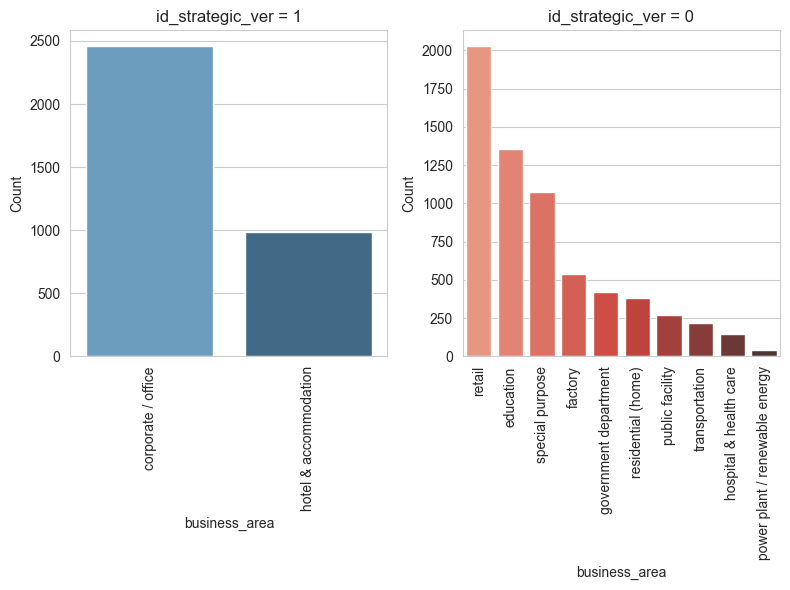

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'ID']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['id_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['id_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


특정 사업 영역(Vertical Level1) -> business_area(고객의 사업 영역) 와 관련이 있음을 그래프를 통해 확인할수 있음

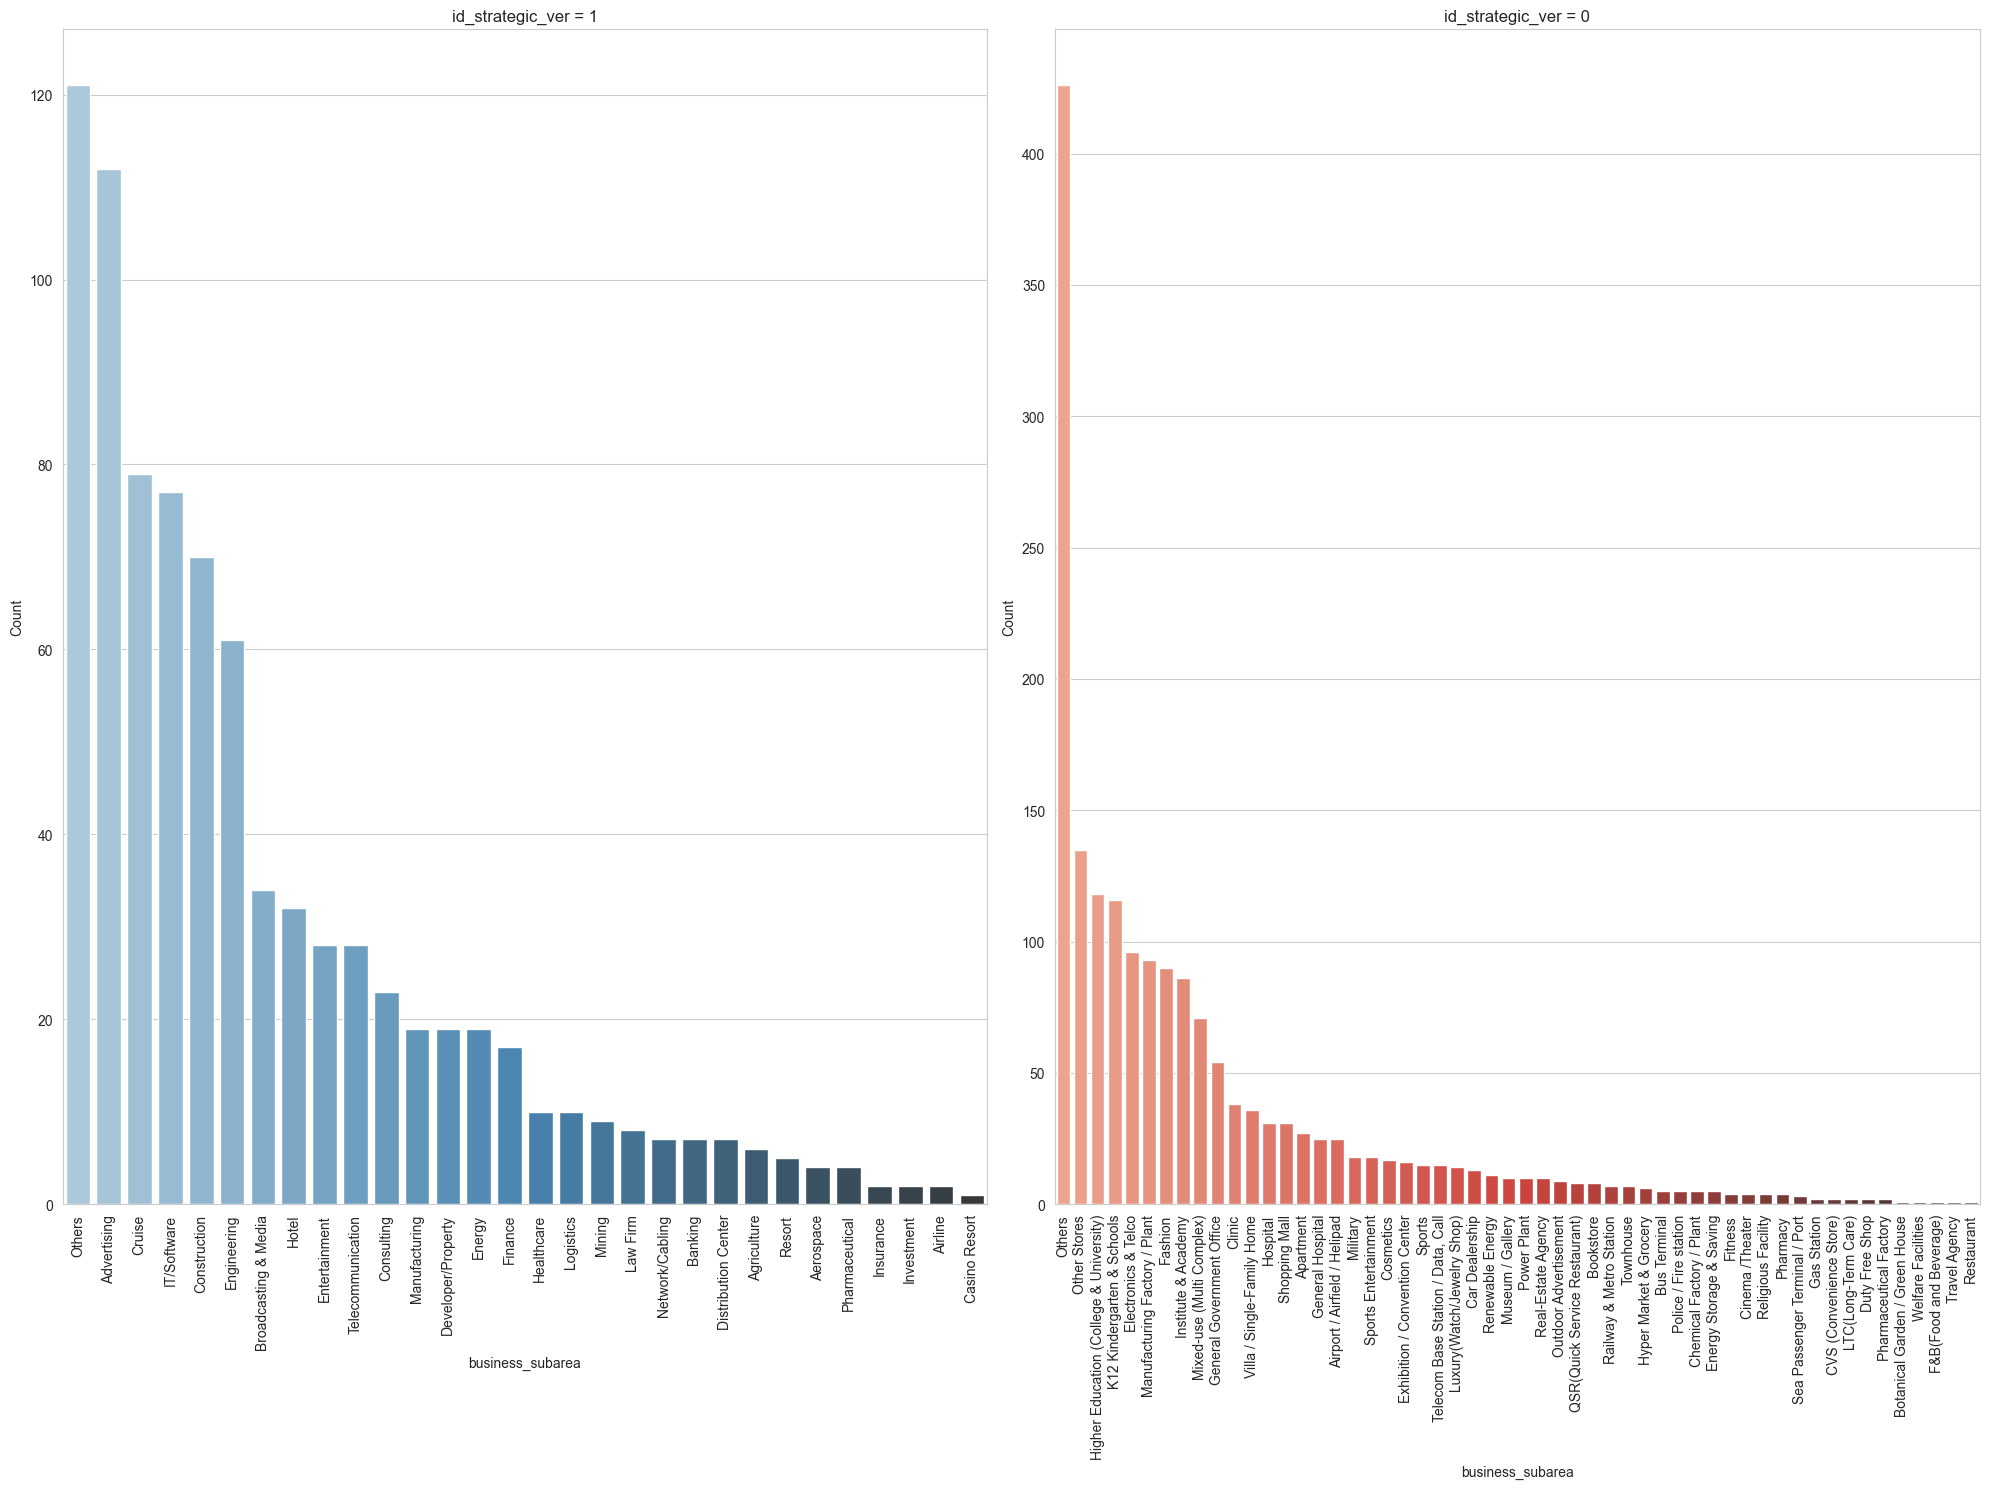

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_subarea'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_subarea'].value_counts()

# 그래프
plt.figure(figsize=(20, 15))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_subarea')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_subarea')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [47]:
# count_id_strategic_0 와 count_id_strategic_1 사이의 차이를 계산
difference = count_id_strategic_0.subtract(count_id_strategic_1, fill_value=0)

# 차이를 출력
print(difference)

business_subarea
Advertising                    -112.0
Aerospace                        -4.0
Agriculture                      -6.0
Airline                          -2.0
Airport / Airfield / Helipad     25.0
                                ...  
Telecommunication               -28.0
Townhouse                         7.0
Travel Agency                     1.0
Villa / Single-Family Home       36.0
Welfare Facilities                1.0
Name: count, Length: 83, dtype: float64


business_subarea (고객의 세부 사업 영역) 부분에서는 유의미한 차이가 보이지않음

id_strategic_ver 는 결국 business_unit이 'ID'이면서,  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

#### 10. it_strategic_ver

(도메인 지식)   
특정 사업부(Business Unit),  
특정 사업 영역(Vertical Level1)에 대해  
가중치를 부여

business_unit 에서 It 사업부에 대한 변수

In [48]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
1.0    1121
Name: count, dtype: int64

In [49]:
# 누락된 값을 0으로 채우기
df_train['it_strategic_ver'].fillna(0, inplace=True)
df_test['it_strategic_ver'].fillna(0, inplace=True)

In [50]:
df_train['it_strategic_ver'].value_counts()

it_strategic_ver
0.0    58178
1.0     1121
Name: count, dtype: int64

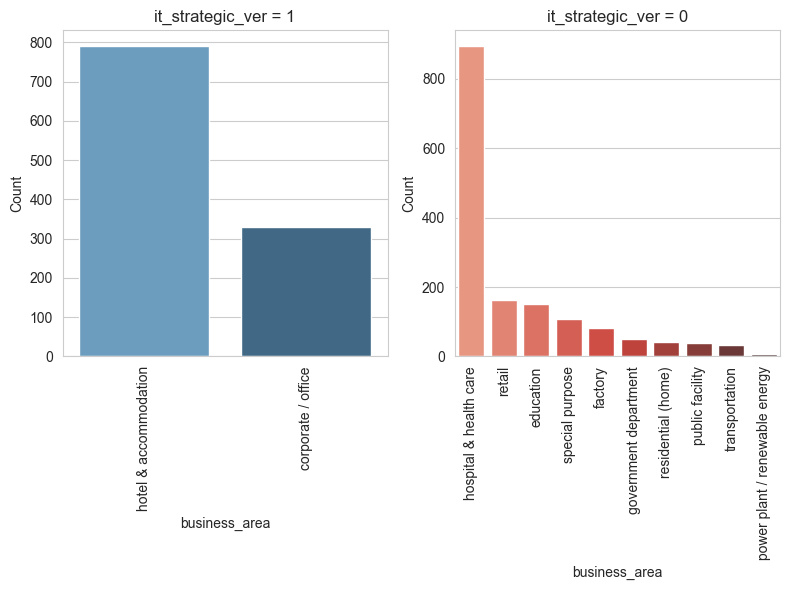

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['business_unit'] == 'IT']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_id_strategic_1 = df_train_id[df_train_id['it_strategic_ver'] == 1]
df_train_id_strategic_0 = df_train_id[df_train_id['it_strategic_ver'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_id_strategic_1 = df_train_id_strategic_1['business_area'].value_counts()
count_id_strategic_0 = df_train_id_strategic_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_id_strategic_1.index, y=count_id_strategic_1.values, palette="Blues_d")
plt.title('it_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_id_strategic_0.index, y=count_id_strategic_0.values, palette="Reds_d")
plt.title('it_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


it_strategic_ver 는 business_unit이 'It'이면서,  
고객의 사업영역은 ID 사업부에서의 가중치와 동일하게  
business_area가 'corporate / office' 또는 'hotel & accommodation'인 값에 대해서  
가중치를 주는 변수임을 확인가능

In [52]:
# # seaborn 스타일 설정
# sns.set_style("whitegrid")

# # business_unit이 'IT'인 데이터만 선택
# df_train_it = df_train[df_train['business_unit'] == 'IT']

# # business_unit이 'IT'인 데이터중에서도 it_strategic_ver = 1 인 값을 business_area 별로 나눔
# df_train_it_ho = df_train_it[df_train_it['business_area'] == 'hotel & accommodation']
# df_train_it_co = df_train_it[df_train_it['business_area'] == 'corporate / office']

# ## 타겟변수 True 비율 계산 ##

# # df_train_it 데이터셋에서 is_converted가 True인 비율 계산
# it_ratio = df_train_it['is_converted'].sum() / len(df_train_it)

# # df_train_it_ho 데이터셋에서 is_converted가 True인 비율 계산
# it_ho_ratio = df_train_it_ho['is_converted'].sum() / len(df_train_it_ho)

# # df_train_it_co 데이터셋에서 is_converted가 True인 비율 계산
# it_co_ratio = df_train_it_co['is_converted'].sum() / len(df_train_it_co)

# # 출력
# it_ratio, it_ho_ratio, it_co_ratio

In [53]:
# # business_unit이 'IT'인 데이터만 선택
# df_train_it = df_train[df_train['business_unit'] == 'IT']

# # business_unit이 'IT'인 데이터중에서도 it_strategic_ver = 1 인 값을 business_area 별로 나눔
# df_train_it_ho = df_train_it[df_train_it['business_area'] == 'hotel & accommodation']
# df_train_it_co = df_train_it[df_train_it['business_area'] == 'corporate / office']
# df_train_it_hoco_no = df_train_it[(df_train_it['business_area'] != 'hotel & accommodation') & (df_train_it['business_area'] != 'corporate / office')]

# it_1 = df_train[df_train['it_strategic_ver'] == 1]
# it_0 = df_train[df_train['it_strategic_ver'] == 0]

# ## 타겟변수 True 비율 계산 ##

# # df_train_it_ho 데이터셋에서 is_converted가 True인 비율 계산
# it_ho_ratio = df_train_it_ho['is_converted'].sum() / len(df_train_it_ho)

# # df_train_it_co 데이터셋에서 is_converted가 True인 비율 계산
# it_co_ratio = df_train_it_co['is_converted'].sum() / len(df_train_it_co)

# # df_train_it_hoco_no 데이터셋에서 is_converted가 True인 비율 계산
# it_hoco_no_ratio = df_train_it_hoco_no['is_converted'].sum() / len(df_train_it_hoco_no)


# # it_1 데이터셋에서 is_converted가 True인 비율 계산
# it_1_ratio = it_1['is_converted'].sum() / len(it_1)
# # it_0 데이터셋에서 is_converted가 True인 비율 계산
# it_0_ratio = it_0['is_converted'].sum() / len(it_0)


# # 출력
# it_ho_ratio, it_co_ratio, it_hoco_no_ratio, it_1_ratio, it_0_ratio

In [54]:
# # business_unit이 'ID'인 데이터만 선택
# df_train_id = df_train[df_train['business_unit'] == 'ID']

# # business_unit이 'ID'인 데이터중에서도 id_strategic_ver = 1 인 값을 business_area 별로 나눔
# df_train_id_ho = df_train_id[df_train_id['business_area'] == 'hotel & accommodation']
# df_train_id_co = df_train_id[df_train_id['business_area'] == 'corporate / office']
# df_train_id_hoco_no = df_train_id[(df_train_id['business_area'] != 'hotel & accommodation') & (df_train_id['business_area'] != 'corporate / office')]

# id_1 = df_train[df_train['id_strategic_ver'] == 1]
# id_0 = df_train[df_train['id_strategic_ver'] == 0]

# ## 타겟변수 True 비율 계산 ##

# # df_train_id_ho 데이터셋에서 is_converted가 True인 비율 계산
# id_ho_ratio = df_train_id_ho['is_converted'].sum() / len(df_train_id_ho)

# # df_train_id_co 데이터셋에서 is_converted가 True인 비율 계산
# id_co_ratio = df_train_id_co['is_converted'].sum() / len(df_train_id_co)

# # df_train_id_hoco_no 데이터셋에서 is_converted가 True인 비율 계산
# id_hoco_no_ratio = df_train_id_hoco_no['is_converted'].sum() / len(df_train_id_hoco_no)


# # id_1 데이터셋에서 is_converted가 True인 비율 계산
# id_1_ratio = id_1['is_converted'].sum() / len(id_1)
# # id_0 데이터셋에서 is_converted가 True인 비율 계산
# id_0_ratio = id_0['is_converted'].sum() / len(id_0)


# # 출력
# id_ho_ratio, id_co_ratio, id_hoco_no_ratio, id_1_ratio, id_0_ratio

#### 11. idit_strategic_ver

Id_strategic_ver이나 it_strategic_ver 값 중   
하나라도 1의 값을 가지면 1 값으로 표현

In [55]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
1.0    4565
Name: count, dtype: int64

In [56]:
# 누락된 값을 0으로 채우기
df_train['idit_strategic_ver'].fillna(0, inplace=True)
df_test['idit_strategic_ver'].fillna(0, inplace=True)

In [57]:
df_train['idit_strategic_ver'].value_counts()

idit_strategic_ver
0.0    54734
1.0     4565
Name: count, dtype: int64

### 가중치 활용

In [58]:
# ## 사업부

# # ID 사업부
# id_unit = df_train[df_train['business_unit'] == 'ID']

# # IT 사업부
# it_unit = df_train[(df_train['business_unit'] == 'IT')]

# # no 사업부
# no_unit = df_train[(df_train['business_unit'] != 'ID') & (df_train['business_unit'] != 'IT')]

# # idit_strategic_ver = 0
# idit_ver_0 = df_train[df_train['idit_strategic_ver'] == 0]

# ## 그룹별 데이터셋 생성 ##
# ## ID 사업부
# # ID 사업부 hotel & accommodation 사업영역
# id_ho = id_unit[id_unit['business_area'] == 'hotel & accommodation']

# # ID 사업부 corporate / office 사업영역
# id_co = id_unit[id_unit['business_area'] == 'corporate / office']

# # ID 사업부 다른 사업영역
# id_no = id_unit[(id_unit['business_area'] != 'hotel & accommodation') & (id_unit['business_area'] != 'corporate / office')]

# # ID 사업부 해당 모든 사업영역
# id_yes = id_unit[(id_unit['business_area'] == 'hotel & accommodation') | (id_unit['business_area'] == 'corporate / office')]

# ## IT 사업부
# # IT 사업부 hotel & accommodation 사업영역
# it_ho = it_unit[it_unit['business_area'] == 'hotel & accommodation']

# # IT 사업부 corporate / office 사업영역
# it_co = it_unit[it_unit['business_area'] == 'corporate / office']

# # IT 사업부 다른 사업영역
# it_no = it_unit[(it_unit['business_area'] != 'hotel & accommodation') & (it_unit['business_area'] != 'corporate / office')]

# # IT 사업부 해당 모든 사업영역
# it_yes = it_unit[(it_unit['business_area'] == 'hotel & accommodation') | (it_unit['business_area'] == 'corporate / office')]

# # ID or IT 사업부 X (test 데이터 기준 AS 사업부)
# idit_no = df_train[(df_train['business_unit'] != 'ID') & (df_train['business_unit'] != 'IT')]


# ## 비율 계산 ##

# # id_ho 인 경우의 전환 고객 비율 계산
# id_ho_ratio = id_ho['is_converted'].mean()

# # id_co 인 경우의 전환 고객 비율 계산
# id_co_ratio = id_co['is_converted'].mean()

# # id_no 인 경우의 전환 고객 비율 계산
# id_no_ratio = id_no['is_converted'].mean()

# # id_yes 인 경우의 전환 고객 비율 계산
# id_yes_ratio = id_yes['is_converted'].mean()

# # it_ho 인 경우의 전환 고객 비율 계산
# it_ho_ratio = it_ho['is_converted'].mean()

# # it_co 인 경우의 전환 고객 비율 계산
# it_co_ratio = it_co['is_converted'].mean()

# # it_no 인 경우의 전환 고객 비율 계산
# it_no_ratio = it_no['is_converted'].mean()

# # it_yes 인 경우의 전환 고객 비율 계산
# it_yes_ratio = it_yes['is_converted'].mean()

# # id_ho 인 경우의 전환 고객 비율 계산
# idit_no_ratio = idit_no['is_converted'].mean()

# # idit_ver_0 인 경우의 전환 고객 비율 계산
# idit_ver_0_ratio = idit_ver_0['is_converted'].mean()

# ## 결과 출력 ##
# print("id_ho_ratio :", id_ho_ratio)
# print("id_co_ratio :", id_co_ratio)
# print("id_no_ratio :", id_no_ratio)
# print("id_yes_ratio :", id_yes_ratio)
# print("it_ho_ratio :", it_ho_ratio)
# print("it_co_ratio :", it_co_ratio)
# print("it_no_ratio :", it_no_ratio)
# print("it_yes_ratio :", it_yes_ratio)
# print("idit_no_ratio :", idit_no_ratio)

# print("idit_ver_0_ratio :", idit_ver_0_ratio)

In [59]:
# import numpy as np

# # 조건에 따라 새로운 열 생성
# conditions = [
#     (df_train['business_unit'] == 'ID') & (df_train['business_area'] == 'hotel & accommodation'),
#     (df_train['business_unit'] == 'ID') & (df_train['business_area'] == 'corporate / office'),
#     (df_train['business_unit'] == 'ID') & (df_train['business_area'] != 'hotel & accommodation') & (df_train['business_area'] != 'corporate / office'),

#     (df_train['business_unit'] == 'IT') & (df_train['business_area'] == 'hotel & accommodation'),
#     (df_train['business_unit'] == 'IT') & (df_train['business_area'] == 'corporate / office'),
#     (df_train['business_unit'] == 'IT') & (df_train['business_area'] != 'hotel & accommodation') & (df_train['business_area'] != 'corporate / office'),

#     (df_train['business_unit'] != 'ID') & (df_train['business_area'] != 'IT'),
# ]

# choices = [0.1189, 0.0886, 0.1033, 0.0025, 0.0333, 0.1102, 0.0553]

# # np.select를 사용하여 새로운 열 생성
# df_train['idit_plus_column'] = np.select(conditions, choices, default=0)

# # 결과 확인
# df_train['idit_plus_column'].value_counts()

In [60]:
# import numpy as np

# # 조건에 따라 새로운 열 생성
# conditions = [
#     (df_test['business_unit'] == 'ID') & (df_test['business_area'] == 'hotel & accommodation'),
#     (df_test['business_unit'] == 'ID') & (df_test['business_area'] == 'corporate / office'),
#     (df_test['business_unit'] == 'ID') & (df_test['business_area'] != 'hotel & accommodation') & (df_test['business_area'] != 'corporate / office'),

#     (df_test['business_unit'] == 'IT') & (df_test['business_area'] == 'hotel & accommodation'),
#     (df_test['business_unit'] == 'IT') & (df_test['business_area'] == 'corporate / office'),
#     (df_test['business_unit'] == 'IT') & (df_test['business_area'] != 'hotel & accommodation') & (df_test['business_area'] != 'corporate / office'),

#     (df_test['business_unit'] != 'ID') & (df_test['business_area'] != 'IT'),
# ]

# choices = [0.1189, 0.0886, 0.1033, 0.0025, 0.0333, 0.1102, 0.0553]

# # np.select를 사용하여 새로운 열 생성
# df_test['idit_plus_column'] = np.select(conditions, choices, default=0)

# # 결과 확인
# df_test['idit_plus_column'].value_counts()

In [61]:
# df_train = df_train.drop(['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)
# df_test = df_test.drop(['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            5271 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  5271 non-null   float64
 9   id_strategic_ver         5271 non-null   float64
 10  it_strategic_ver         5271 non-null   float64
 11  idit_strategic_ver       5271 non-null   float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

#### 12. customer_job

고객의 직업군

In [63]:
# 출력 옵션을 원래대로
pd.reset_option('display.max_rows')

In [64]:
df_train['customer_job'].value_counts()

customer_job
engineering                       6342
other                             4852
administrative                    3359
education                         2287
sales                             2218
                                  ... 
appliance specialist                 1
av estimator                         1
purchasers                           1
pricing                              1
exhibition / convention center       1
Name: count, Length: 560, dtype: int64

In [65]:
df_test['customer_job'].value_counts()

customer_job
engineering                         728
others                              482
education                           408
administrative                      307
information technology              231
operations                          195
purchasing                          180
consulting                          166
business development                164
sales                               162
entrepreneurship                    119
arts and design                     102
program and project management       96
marketing                            94
media and communication              48
support                              47
healthcare services                  44
finance                              42
product management                   36
accounting                           34
real estate                          26
other                                24
community and social services        22
legal                                17
human resources            

In [66]:
print(df_train['customer_job'].isnull().sum())

18733


In [67]:
# 누락된 값을 0으로 채우기
df_train['customer_job'].fillna('Unknown', inplace=True)
df_test['customer_job'].fillna('Unknown', inplace=True)

In [68]:
print(df_train['customer_job'].isnull().sum())

0


#### 13. lead_desc_length

고객이 작성한 Lead Descriptoin 텍스트 총 길이

In [69]:
df_train['lead_desc_length'].value_counts()

lead_desc_length
3      10378
14      3180
2        934
10       891
4        884
       ...  
824        1
559        1
676        1
907        1
726        1
Name: count, Length: 909, dtype: int64

In [70]:
print(df_train['lead_desc_length'].isnull().sum())

0


#### 14. inquiry_type

고객의 문의 유형

In [71]:
# 출력 옵션을 설정
pd.set_option('display.max_rows', None)

In [72]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
Usage or technical consultation                                                                                          668
Trainings                                                                                                                434
Technical Consultation                                                                                          

In [73]:
# 'inquiry_type' 열의 철자오류에 대해 일관된 값으로 변환
## Ctrl + Shift + [ : 현재 영역 접기
df_train['inquiry_type'] = df_train['inquiry_type'].replace({

    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',

    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'technical': 'Usage or Technical Consultation',

    'sales':'Sales Inquiry',
    'Sales inquiry':'Sales Inquiry',

    'other': 'Other',
    'other_': 'Other',
    'others': 'Other',
    'Others' : 'Other',
    'Etc.': 'Other',
    'ETC.': 'Other'

})

df_test['inquiry_type'] = df_test['inquiry_type'].replace({

    'Quotation or purchase consultation': 'Quotation or Purchase Consultation',
    'Request for quotation or purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'Purchase or Quotation': 'Quotation or Purchase Consultation',
    'Quotation or Purchase consultation': 'Quotation or Purchase Consultation',
    'Purchase': 'Quotation or Purchase Consultation',
    'quotation_or_purchase_consultation': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',
    'quotation_': 'Quotation or Purchase Consultation',

    'Usage or technical consultation': 'Usage or Technical Consultation',
    'Technical Consultation': 'Usage or Technical Consultation',
    'usage or technical consultation': 'Usage or Technical Consultation',
    'usage_or_technical_consultation': 'Usage or Technical Consultation',
    'Request for technical consulting': 'Usage or Technical Consultation',
    'technical_consultation': 'Usage or Technical Consultation',
    'technical': 'Usage or Technical Consultation',

    'sales':'Sales Inquiry',
    'Sales inquiry':'Sales Inquiry',

    'other': 'Other',
    'other_': 'Other',
    'others': 'Other',
    'Others' : 'Other',
    'Etc.': 'Other',
    'ETC.': 'Other'

})


In [74]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation                                                                                     42384
Sales Inquiry                                                                                                          10081
Usage or Technical Consultation                                                                                         1668
Other                                                                                                                   1401
Product Information                                                                                                     1237
Trainings                                                                                                                434
Services                                                                                                                 415
Request for Partnership                                                                                         

In [75]:
# # 'inquiry_type' 열의 값별 개수를 계산합니다.
# value_counts = df_train['inquiry_type'].value_counts()

# # 10개 이하인 값들의 리스트를 만듭니다.
# to_replace = value_counts[value_counts <= 10].index

# # 10개 이하인 값들을 'Other'로 업데이트합니다.
# df_train['inquiry_type'] = df_train['inquiry_type'].replace(to_replace, 'Other')


In [76]:
# # 'inquiry_type' 열의 값별 개수를 계산합니다.
# value_counts = df_test['inquiry_type'].value_counts()

# # 10개 이하인 값들의 리스트를 만듭니다.
# to_replace = value_counts[value_counts <= 10].index

# # 10개 이하인 값들을 'Other'로 업데이트합니다.
# df_test['inquiry_type'] = df_test['inquiry_type'].replace(to_replace, 'Other')


In [77]:
df_train['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation                                                                                     42384
Sales Inquiry                                                                                                          10081
Usage or Technical Consultation                                                                                         1668
Other                                                                                                                   1401
Product Information                                                                                                     1237
Trainings                                                                                                                434
Services                                                                                                                 415
Request for Partnership                                                                                         

In [78]:
df_test['inquiry_type'].value_counts()

inquiry_type
Quotation or Purchase Consultation    3465
Usage or Technical Consultation        187
Other                                  122
Product Information                     68
Request for Partnership                 63
Services                                34
Trainings                               21
Request a Demo                           9
Customer Suggestions                     4
OEM/ODM Request                          3
Media Inquiry                            2
Request for Distributorship              1
Name: count, dtype: int64

In [79]:
print(df_train['inquiry_type'].isnull().sum())

941


In [80]:
# 'inquiry_type' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['inquiry_type'] = df_train['inquiry_type'].fillna('Unknown')
df_test['inquiry_type'] = df_test['inquiry_type'].fillna('Unknown')

In [81]:
print(df_train['inquiry_type'].isnull().sum())

0


#### 15. product_category

요청 제품 카테고리

In [82]:
df_train['product_category'].value_counts()

product_category
interactive digital board                                                                               6154
vrf                                                                                                     5640
multi-split                                                                                             3674
video wall signage                                                                                      2029
etc.                                                                                                    2018
led signage                                                                                             1895
interactive signage                                                                                     1862
single-split                                                                                            1569
rac                                                                                                     1447
ol

In [83]:
df_train['product_category'] = df_train['product_category'].replace({
    'rac': 'Air Conditioner',
    'vrf,chiller': 'Air Conditioner',
    'single package': 'Air Conditioner',
    'scroll compressor': 'Others',
    'pantalla led outdoor': 'Digital Signage',
    'not specified': 'Others',
    'etc.': 'Others',
    'vrf,multi-split,etc.': 'Air Conditioner',
    'vrf,multi-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'solar,robot': 'Solar',
    'rac single cac': 'Air Conditioner',
    'teto ou cassete inverter': 'Air Conditioner',
    'multi inverter': 'Air Conditioner',
    '28mq780': 'TV and Display',
    '32 pol': 'TV and Display',
    'tv 43 pol': 'TV and Display',
    '43 pol': 'TV and Display',
    'commercial tv,solar,ess,monior/monitor tv,pc,p...': 'TV and Display',
    'tv,refrigerator': 'TV and Display',
    'a definir': 'Others',
    'điều hòa trung tâm chiller': 'Air Conditioner',
    'điều hòa cục bộ': 'Air Conditioner',
    'tv 55"': 'TV and Display',
    'surgical monitor': 'Medical Display',
    'gsca046': 'Others',
    'gscd100': 'Others',
    'procentric': 'Others',
    'tv signage': 'TV and Display',
    'collaboration displays': 'Digital Signage',
    'id': 'Others',
    'meeting & screen sharedirect view leddirect vi...': 'Digital Signage',
    'window facing display': 'Digital Signage',
    'lg customer care program': 'Others',
    'led': 'TV and Display',
    'lainnya': 'Others',
    'control': 'Others',
    'pendingin': 'Others',
    'ar condicionado residencial': 'Air Conditioner',
    'multi v5 vrf': 'Air Conditioner',
    'split tunggal': 'Air Conditioner',
    'multi v': 'Air Conditioner',
    'ac rumah': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'אחר': 'Others',
    'vrf,multi-split': 'Air Conditioner',
    'vrf,multi-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,heating': 'Air Conditioner',
    'error': 'Others',
    'others': 'Others',
    'computer monitors': 'TV and Display',
    'monitor & pc': 'Digital Signage',
    'medical monitors': 'Medical Display',
    'system air conditioner': 'Air Conditioner',
    'solar,ess,ems': 'Solar',
    'tv,mobile': 'TV and Display',
    'commercial tv,projector': 'TV and Display',
    'aircare,water care': 'Heating and Ventilation',
    'monior/monitor tv,chiller': 'TV and Display',
    'system ac,chiller': 'Heating and Ventilation',
    'system ac,aircare': 'Heating and Ventilation',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'system ac,tv': 'Air Conditioner',
    'solar': 'Solar',
    'monior/monitor tv,pc': 'TV and Display',
    'monitor signage,pc': 'Digital Signage',
    'solar,monior/monitor tv': 'Solar',
    'solar,projector': 'Solar',
    'commercial tv,robot': 'TV and Display',
    'energy storage system': 'Energy Storage',
    'tv,audio/video': 'TV and Display',
    'monitor signage,audio/video': 'Digital Signage',
    'monitor signage,commercial tv,monior/monitor tv,projector,tv': 'Digital Signage',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc': 'Solar',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'monitor signage,commercial tv,monior/monitor tv,tv': 'Digital Signage',
    'monitor signage,monior/monitor tv,tv,audio/video': 'Digital Signage',
    'pc,tv': 'TV and Display',
    'sac': 'Air Conditioner',
    'monitor signage,solar': 'Solar',
    'solar,refrigerator': 'Solar',
    'monitor signage,system ac': 'Digital Signage',
    'system air conditioner,solar': 'Solar',
    'solar,tv': 'Solar',
    'monitor signage,tv': 'TV and Display',
    'dryer,chiller': 'Heating and Ventilation',
    'videwall': 'Digital Signage',
    'ultra stretch signage': 'Digital Signage',
    'solar,vacuum cleaner': 'Solar',
    'monitor signage,solar,robot,water care': 'Solar',
    'mobile,audio/video': 'Others',
    'system ac,refrigerator,washing machine,dryer': 'Heating and Ventilation',
    'solar,system ac,aircare': 'Solar',
    'projector,system ac,water care': 'TV and Display',
    'chiller,water care': 'Heating and Ventilation',
    'ess,chiller': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv,pc,tv': 'Digital Signage',
    'solar,water care': 'Solar',
    'digital signage or commercial tvs': 'Digital Signage',
    'education createboard': 'Digital Signage',
    'virtual production': 'Others',
    'laec015': 'Others',
    'monitor signage,commercial tv,audio/video': 'Digital Signage',
    'solar,built-in/cooking': 'Solar',
    'monitor signage,monior/monitor tv,commercial tv': 'Digital Signage',
    'commercial tv,monior/monitor tv': 'TV and Display',
    'robot,system ac': 'Others',
    '55us660h0sd.bwz': 'Others',
    'transparent oled': 'Digital Signage',
    'medical- surgical': 'Medical Display',
    'radiology displays': 'Medical Display',
    'high inch 86 / 98 or 110': 'TV and Display',
    'leadallin': 'Others',
    'ฯลฯ': 'Others',
    'commercial tv,water care': 'TV and Display',
    'pc,washing machine': 'Others',
    'system air conditioner,energy storage system': 'Air Conditioner',
    'tv,commercial tv': 'TV and Display',
    'system ac,home beauty': 'Heating and Ventilation',
    'information display,monitor': 'Digital Signage',
    'taa lcd lfd displays': 'Digital Signage',
    'rac/cac': 'Air Conditioner',
    'حلول التدفئة': 'Heating and Ventilation',
    'system ac,chiller,aircare': 'Heating and Ventilation',
    'otros': 'Others',
    'tv,refrigerator,washing machine': 'TV and Display',
    'monior/monitor tv,refrigerator': 'TV and Display',
    'projector,audio/video': 'TV and Display',
    'monior/monitor tv,audio/video': 'TV and Display',
    'refrigerator,washing machine,built-in/cooking': 'Heating and Ventilation',
    'system ac': 'Heating and Ventilation',
    'laec015-gn.awz': 'Others',
    'gscd046': 'Others',
    '32lq621cbsb.awz': 'TV and Display',
    '43uh5f-h.awzm': 'TV and Display',
    '49vl5g-m.awzm': 'TV and Display',
    '55uq801c0sb.bwz': 'TV and Display',
    '43uq751c0sf.bwz': 'TV and Display',
    '32 / 43 pol': 'TV and Display',
    'htv': 'TV and Display',
    '43uq751c0sb.bwz': 'TV and Display',
    '49uh / 49xf': 'TV and Display',
    '50us660h0sd.bwz': 'TV and Display',
    'tv 60"': 'TV and Display',
    'medical monitor': 'Medical Display',
    'aircare,mobile': 'Others',
    'solar,ess,system ac': 'Solar',
    'system ac,refrigerator': 'Heating and Ventilation',
    'tv,pc': 'TV and Display',
    'chiller,refrigerator': 'Heating and Ventilation',
    'commercial tv,solar': 'Solar',
    'monior/monitor tv,projector,audio/video': 'TV and Display',
    'unitario': 'Others',
    'refrigerator,chiller': 'Heating and Ventilation',
    'chiller,tv': 'Heating and Ventilation',
    'projector,ems': 'TV and Display',
    'monitor signage,mobile': 'Digital Signage',
    'robot,vacuum cleaner': 'Others',
    'điều hòa trung tâm multi': 'Air Conditioner',
    'ogrzewanie (pompy ciepła)': 'Heating and Ventilation',
    'soğutucu': 'Others',
    'điều hòa gia dụng': 'Air Conditioner',
    'نظام التدفق المتغيرvrf': 'Air Conditioner',
    'chiller/enfriadoras': 'Heating and Ventilation',
    '49vl5g-m': 'TV and Display',
    'lg led bloc': 'TV and Display',
    'uh': 'Others',
    '55vm5e-a': 'TV and Display',
    'laec15': 'Others',
    '55vm5j-h': 'TV and Display',
    '49vl5f': 'TV and Display',
    'standalone': 'Others',
    'corpouh5f': 'Others',
    'ledallinone': 'TV and Display',
    'monitorindustrial_rmk': 'Digital Signage',
    'lg magnit': 'TV and Display',
    '特別顯示屏': 'Digital Signage',
    'signage': 'Digital Signage',
    'videowall_rmk': 'Digital Signage',
    'bu50nst': 'TV and Display',
    'led 70m2': 'TV and Display',
    'led cinema': 'TV and Display',
    '86uh5f': 'TV and Display',
    '55tc3d': 'TV and Display',
    '43us660h (na)': 'TV and Display',
    'pro centric hotel': 'Digital Signage',
    'video wall + aio': 'Digital Signage',
    'hospitality': 'Others',
    'one:quick': 'Others',
    '高亮度顯示屏': 'Digital Signage',
    'comercial tv': 'TV and Display',
    'corpuh5f-': 'Others',
    'allinone_rmk': 'TV and Display',
    'hoteleria_us670h': 'Others',
    'retaildigital': 'Digital Signage',
    '軟體': 'Others',
    '醫院電視': 'Others',
    'ctv': 'TV and Display',
    'calefacción': 'Heating and Ventilation',
    'autre': 'Others',
    'vb.': 'Others',
    'ac rumah': 'Air Conditioner',
    'เครื่องปรับอากาศเผื่อที่อยู่อาศัย': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'vrf - multi v s': 'Air Conditioner',
    'systèmes de débit à réfrigérant variable (drv)': 'Air Conditioner',
    'climatiseur résidentiel': 'Air Conditioner',
    'multi-split (plusieurs pièces)': 'Air Conditioner',
    'aquecimento': 'Heating and Ventilation',
    'khác': 'Others',
    'lg salang air solution for dream homes': 'Others',
    'services': 'Others',
    'آخر': 'Others',
    'vrf,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,etc.': 'Air Conditioner',
    'multi-split,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split': 'Air Conditioner',
    'on or several reversible ac': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'video wall signage': 'Digital Signage',
    'led signage': 'Digital Signage',
    'interactive signage': 'Digital Signage',
    'single-split': 'Air Conditioner',
    'oled signage': 'Digital Signage',
    'hotel tv': 'TV and Display',
    'chiller': 'Heating and Ventilation',
    'standard signage': 'Digital Signage',
    'medical display': 'Medical Display',
    'lg one:quick series': 'TV and Display',
    'monitor': 'TV and Display',
    'one:quick series': 'TV and Display',
    'heating': 'Heating and Ventilation',
    'high brightness signage': 'Digital Signage',
    'ventilation': 'Heating and Ventilation',
    'high brightness': 'Others',
    'software solution': 'Others',
    'accessories': 'Others',
    'special signage': 'Digital Signage',
    'all lg vrf systems': 'Air Conditioner',
    'commercial display': 'TV and Display',
    'residential air conditioner': 'Air Conditioner',
    'ur640s': 'TV and Display',
    'outros': 'Others',
    'signage care solution': 'Digital Signage',
    'multi v 5 air': 'Air Conditioner',
    'smart tv signage': 'TV and Display',
    'technical support': 'Others',
    'projector': 'TV and Display',
    'ur640': 'TV and Display',
    'cloud device': 'Others',
    'medical displays': 'Medical Display',
    'laptop': 'Others',
    'a thermodynamic water heater': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv': 'Digital Signage',
    'uhd signage': 'Digital Signage',
    'idb': 'Others',
    'commercial tv': 'TV and Display',
    '43us660h0sd.awz': 'TV and Display',
    'digital signage': 'Digital Signage',
    'solar,ess': 'Solar',
    'commercial tv,tv': 'TV and Display',
    'onequick series': 'TV and Display',
    'led 顯示屏': 'Digital Signage',
    'monior/monitor tv,tv': 'TV and Display',
    'multi v water 5': 'Air Conditioner',
    'other': 'Others',
    'tv': 'TV and Display',
    'isıtma': 'Heating and Ventilation',
    'solar,system ac': 'Solar',
    'lg one:quick': 'TV and Display',
    'fhd series': 'TV and Display',
    'sales inquiry': 'Others',
    'washing machine,dryer': 'Others',
    'solar,aircare': 'Solar',
    'interactive digital board': 'Digital Signage',
    'vrf': 'Air Conditioner',
    'multi-split': 'Air Conditioner',
    'hospital tv': 'TV and Display',
    'webos': 'Others',
    'pc': 'Others',
    'pro:centric': 'Digital Signage',
    'video wall': 'Digital Signage',
    '互動式顯示屏': 'Digital Signage',
    'تكييف وتبريد': 'Heating and Ventilation',
    'chiller,aircare': 'Heating and Ventilation',
    'oled 顯示屏': 'Digital Signage',
    'robots': 'Others',
    'solar,chiller': 'Solar',
    '標準顯示屏': 'Digital Signage',
    'מזגנים למקום מגורים': 'Air Conditioner',
    'single split': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv': 'Digital Signage',
    'مبرد (تشيلر)': 'Heating and Ventilation',
    'commercial tv,audio/video': 'TV and Display',
    'تكييفات': 'Air Conditioner',
    'standard': 'Others',
    'חימום': 'Heating and Ventilation',
    'kimatyzacja vrf': 'Air Conditioner',
    'lg home bliss air solution': 'Others',
    'multi split': 'Air Conditioner',
    'ahu': 'Heating and Ventilation',
    '酒店電視': 'TV and Display',
    'aio': 'Others',
    'one quick:flex': 'TV and Display',
    '50uq801c0sb.bwz': 'TV and Display',
    'ultra stretch series': 'TV and Display',
    'klimatyzacja multi-split': 'Air Conditioner',
    'Heating': 'Heating and Ventilation',
    'system ac,rac': 'Air Conditioner',
    'Energy Storage': 'Energy Storage',
    'signage care solutions': 'Digital Signage',
    'commercial tv,solar,ess,projector,system ac,tv,washing machine,home beauty,audio/video': 'Digital Signage',
    'inne': 'Others',
    'monitor signage,commercial tv,monior/monitor tv,audio/video': 'Digital Signage',
    'single cac': 'Air Conditioner',
    'solar,energy storage system': 'Solar',
    'system ac,solar': 'Solar',
    'solar,system ac,water care': 'Solar',
    '55svh7f-a': 'TV and Display',
    'tr3': 'Others',
    '98uh5e': 'TV and Display',
    'monitor signage,commercial tv,monior/monitor tv,pc,projector,tv,audio/video': 'Digital Signage',
    'monitor signage,monior/monitor tv,vacuum cleaner,tv,home beauty,commercial tv,pc,refrigerator,styler': 'Digital Signage',
    'điều hòa trung tâm vrf': 'Air Conditioner',
    'cac': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv,pc,tv,home beauty,audio/video': 'Digital Signage',
    'pc,robot,system ac,chiller,tv,refrigerator,washing machine,vacuum cleaner,styler,dryer,mobile,audio/': 'Digital Signage',
    'tv,refrigerator,washing machine,vacuum cleaner,audio/video': 'TV and Display',
    'refrigerator,built-in/cooking': 'Others',
    'vrf,heating': 'Air Conditioner',
    'ems,audio/video': 'Others',
    'projector,ems,mobile,audio/video': 'Digital Signage',
    'smart tv': 'TV and Display',
    'lsca039': 'Others',
    'essential series': 'Others',
    'system ac,tv,refrigerator,washing machine,built-in/cooking,audio/video': 'Others',
    'solar,monior/monitor tv,pc,tv,refrigerator,washing machine,dryer,home beauty': 'Others',
    'monitor signage,monior/monitor tv,system ac,vacuum cleaner,tv,home beauty,commercial tv,mobile,audio': 'Digital Signage',
    'chiller,dryer': 'Heating and Ventilation',
    'solar,dryer': 'Solar',
    'refrigerator': 'Others',
    'parts': 'Others',
    'monior/monitor tv,system ac,tv,refrigerator,washing machine,dryer,built-in/cooking': 'Others',
    'lg paradise air solution': 'Others',
    'פיצול מרובה': 'Others',
    'meeting & screen sharedirect view leddirect view led': 'Digital Signage',
    'one:quick flex': 'TV and Display',
    'videowall signage': 'Digital Signage',
    '110 + video wall': 'Digital Signage',
    'aio | one quick': 'Others',
    'aircare,built-in/cooking': 'Heating and Ventilation',
    'one quick works': 'Others',
    'led aio 136': 'TV and Display',
    'monior/monitor tv,refrigerator,audio/video': 'Digital Signage',
    'monitor signage,commercial tv': 'Others',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chill': 'Others',
    'monior/monitor tv,system ac,tv,pc,refrigerator,water care,solar,washing machine,mobile,chiller,built': 'Others',
    'monitor signage,commercial tv,solar,projector,robot,chiller,refrigerator,built-in/cooking,water care': 'Others',
    'monitor signage,commercial tv,solar,pc,projector,system ac,ems,rac,chiller,refrigerator,washing mach': 'Others',
    'system ac,solar,washing machine': 'Others',
    'monitor signage,solar,monior/monitor tv,pc,projector,robot,system ac,tv,refrigerator,washing machine': 'Others',
    'monior/monitor tv,tv,commercial tv,pc,refrigerator,solar,rac,washing machine,mobile,ess,audio/video': 'Others',
    'commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chiller,refrigerator,': 'Others',
})
df_test['product_category'] = df_test['product_category'].replace({
    'rac': 'Air Conditioner',
    'vrf,chiller': 'Air Conditioner',
    'single package': 'Air Conditioner',
    'scroll compressor': 'Others',
    'pantalla led outdoor': 'Digital Signage',
    'not specified': 'Others',
    'etc.': 'Others',
    'vrf,multi-split,etc.': 'Air Conditioner',
    'vrf,multi-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'solar,robot': 'Solar',
    'rac single cac': 'Air Conditioner',
    'teto ou cassete inverter': 'Air Conditioner',
    'multi inverter': 'Air Conditioner',
    '28mq780': 'TV and Display',
    '32 pol': 'TV and Display',
    'tv 43 pol': 'TV and Display',
    '43 pol': 'TV and Display',
    'commercial tv,solar,ess,monior/monitor tv,pc,p...': 'TV and Display',
    'tv,refrigerator': 'TV and Display',
    'a definir': 'Others',
    'điều hòa trung tâm chiller': 'Air Conditioner',
    'điều hòa cục bộ': 'Air Conditioner',
    'tv 55"': 'TV and Display',
    'surgical monitor': 'Medical Display',
    'gsca046': 'Others',
    'gscd100': 'Others',
    'procentric': 'Others',
    'tv signage': 'TV and Display',
    'collaboration displays': 'Digital Signage',
    'id': 'Others',
    'meeting & screen sharedirect view leddirect vi...': 'Digital Signage',
    'window facing display': 'Digital Signage',
    'lg customer care program': 'Others',
    'led': 'TV and Display',
    'lainnya': 'Others',
    'control': 'Others',
    'pendingin': 'Others',
    'ar condicionado residencial': 'Air Conditioner',
    'multi v5 vrf': 'Air Conditioner',
    'split tunggal': 'Air Conditioner',
    'multi v': 'Air Conditioner',
    'ac rumah': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'אחר': 'Others',
    'vrf,multi-split': 'Air Conditioner',
    'vrf,multi-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,heating': 'Air Conditioner',
    'error': 'Others',
    'others': 'Others',
    'computer monitors': 'TV and Display',
    'monitor & pc': 'Digital Signage',
    'medical monitors': 'Medical Display',
    'system air conditioner': 'Air Conditioner',
    'solar,ess,ems': 'Solar',
    'tv,mobile': 'TV and Display',
    'commercial tv,projector': 'TV and Display',
    'aircare,water care': 'Heating and Ventilation',
    'monior/monitor tv,chiller': 'TV and Display',
    'system ac,chiller': 'Heating and Ventilation',
    'system ac,aircare': 'Heating and Ventilation',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'system ac,tv': 'Air Conditioner',
    'solar': 'Solar',
    'monior/monitor tv,pc': 'TV and Display',
    'monitor signage,pc': 'Digital Signage',
    'solar,monior/monitor tv': 'Solar',
    'solar,projector': 'Solar',
    'commercial tv,robot': 'TV and Display',
    'energy storage system': 'Energy Storage',
    'tv,audio/video': 'TV and Display',
    'monitor signage,audio/video': 'Digital Signage',
    'monitor signage,commercial tv,monior/monitor tv,projector,tv': 'Digital Signage',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc': 'Solar',
    'monitor signage,commercial tv,solar,ess': 'Solar',
    'monitor signage,commercial tv,monior/monitor tv,tv': 'Digital Signage',
    'monitor signage,monior/monitor tv,tv,audio/video': 'Digital Signage',
    'pc,tv': 'TV and Display',
    'sac': 'Air Conditioner',
    'monitor signage,solar': 'Solar',
    'solar,refrigerator': 'Solar',
    'monitor signage,system ac': 'Digital Signage',
    'system air conditioner,solar': 'Solar',
    'solar,tv': 'Solar',
    'monitor signage,tv': 'TV and Display',
    'dryer,chiller': 'Heating and Ventilation',
    'videwall': 'Digital Signage',
    'ultra stretch signage': 'Digital Signage',
    'solar,vacuum cleaner': 'Solar',
    'monitor signage,solar,robot,water care': 'Solar',
    'mobile,audio/video': 'Others',
    'system ac,refrigerator,washing machine,dryer': 'Heating and Ventilation',
    'solar,system ac,aircare': 'Solar',
    'projector,system ac,water care': 'TV and Display',
    'chiller,water care': 'Heating and Ventilation',
    'ess,chiller': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv,pc,tv': 'Digital Signage',
    'solar,water care': 'Solar',
    'digital signage or commercial tvs': 'Digital Signage',
    'education createboard': 'Digital Signage',
    'virtual production': 'Others',
    'laec015': 'Others',
    'monitor signage,commercial tv,audio/video': 'Digital Signage',
    'solar,built-in/cooking': 'Solar',
    'monitor signage,monior/monitor tv,commercial tv': 'Digital Signage',
    'commercial tv,monior/monitor tv': 'TV and Display',
    'robot,system ac': 'Others',
    '55us660h0sd.bwz': 'Others',
    'transparent oled': 'Digital Signage',
    'medical- surgical': 'Medical Display',
    'radiology displays': 'Medical Display',
    'high inch 86 / 98 or 110': 'TV and Display',
    'leadallin': 'Others',
    'ฯลฯ': 'Others',
    'commercial tv,water care': 'TV and Display',
    'pc,washing machine': 'Others',
    'system air conditioner,energy storage system': 'Air Conditioner',
    'tv,commercial tv': 'TV and Display',
    'system ac,home beauty': 'Heating and Ventilation',
    'information display,monitor': 'Digital Signage',
    'taa lcd lfd displays': 'Digital Signage',
    'rac/cac': 'Air Conditioner',
    'حلول التدفئة': 'Heating and Ventilation',
    'system ac,chiller,aircare': 'Heating and Ventilation',
    'otros': 'Others',
    'tv,refrigerator,washing machine': 'TV and Display',
    'monior/monitor tv,refrigerator': 'TV and Display',
    'projector,audio/video': 'TV and Display',
    'monior/monitor tv,audio/video': 'TV and Display',
    'refrigerator,washing machine,built-in/cooking': 'Heating and Ventilation',
    'system ac': 'Heating and Ventilation',
    'laec015-gn.awz': 'Others',
    'gscd046': 'Others',
    '32lq621cbsb.awz': 'TV and Display',
    '43uh5f-h.awzm': 'TV and Display',
    '49vl5g-m.awzm': 'TV and Display',
    '55uq801c0sb.bwz': 'TV and Display',
    '43uq751c0sf.bwz': 'TV and Display',
    '32 / 43 pol': 'TV and Display',
    'htv': 'TV and Display',
    '43uq751c0sb.bwz': 'TV and Display',
    '49uh / 49xf': 'TV and Display',
    '50us660h0sd.bwz': 'TV and Display',
    'tv 60"': 'TV and Display',
    'medical monitor': 'Medical Display',
    'aircare,mobile': 'Others',
    'solar,ess,system ac': 'Solar',
    'system ac,refrigerator': 'Heating and Ventilation',
    'tv,pc': 'TV and Display',
    'chiller,refrigerator': 'Heating and Ventilation',
    'commercial tv,solar': 'Solar',
    'monior/monitor tv,projector,audio/video': 'TV and Display',
    'unitario': 'Others',
    'refrigerator,chiller': 'Heating and Ventilation',
    'chiller,tv': 'Heating and Ventilation',
    'projector,ems': 'TV and Display',
    'monitor signage,mobile': 'Digital Signage',
    'robot,vacuum cleaner': 'Others',
    'điều hòa trung tâm multi': 'Air Conditioner',
    'ogrzewanie (pompy ciepła)': 'Heating and Ventilation',
    'soğutucu': 'Others',
    'điều hòa gia dụng': 'Air Conditioner',
    'نظام التدفق المتغيرvrf': 'Air Conditioner',
    'chiller/enfriadoras': 'Heating and Ventilation',
    '49vl5g-m': 'TV and Display',
    'lg led bloc': 'TV and Display',
    'uh': 'Others',
    '55vm5e-a': 'TV and Display',
    'laec15': 'Others',
    '55vm5j-h': 'TV and Display',
    '49vl5f': 'TV and Display',
    'standalone': 'Others',
    'corpouh5f': 'Others',
    'ledallinone': 'TV and Display',
    'monitorindustrial_rmk': 'Digital Signage',
    'lg magnit': 'TV and Display',
    '特別顯示屏': 'Digital Signage',
    'signage': 'Digital Signage',
    'videowall_rmk': 'Digital Signage',
    'bu50nst': 'TV and Display',
    'led 70m2': 'TV and Display',
    'led cinema': 'TV and Display',
    '86uh5f': 'TV and Display',
    '55tc3d': 'TV and Display',
    '43us660h (na)': 'TV and Display',
    'pro centric hotel': 'Digital Signage',
    'video wall + aio': 'Digital Signage',
    'hospitality': 'Others',
    'one:quick': 'Others',
    '高亮度顯示屏': 'Digital Signage',
    'comercial tv': 'TV and Display',
    'corpuh5f-': 'Others',
    'allinone_rmk': 'TV and Display',
    'hoteleria_us670h': 'Others',
    'retaildigital': 'Digital Signage',
    '軟體': 'Others',
    '醫院電視': 'Others',
    'ctv': 'TV and Display',
    'calefacción': 'Heating and Ventilation',
    'autre': 'Others',
    'vb.': 'Others',
    'ac rumah': 'Air Conditioner',
    'เครื่องปรับอากาศเผื่อที่อยู่อาศัย': 'Air Conditioner',
    'aire acondicionado residencial': 'Air Conditioner',
    'vrf - multi v s': 'Air Conditioner',
    'systèmes de débit à réfrigérant variable (drv)': 'Air Conditioner',
    'climatiseur résidentiel': 'Air Conditioner',
    'multi-split (plusieurs pièces)': 'Air Conditioner',
    'aquecimento': 'Heating and Ventilation',
    'khác': 'Others',
    'lg salang air solution for dream homes': 'Others',
    'services': 'Others',
    'آخر': 'Others',
    'vrf,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller,etc.': 'Air Conditioner',
    'multi-split,single-split': 'Air Conditioner',
    'vrf,multi-split,single-split': 'Air Conditioner',
    'on or several reversible ac': 'Air Conditioner',
    'vrf,multi-split,single-split,chiller': 'Air Conditioner',
    'vrf,multi-split,single-split,heating': 'Air Conditioner',
    'vrf,single-split,chiller': 'Air Conditioner',
    'video wall signage': 'Digital Signage',
    'led signage': 'Digital Signage',
    'interactive signage': 'Digital Signage',
    'single-split': 'Air Conditioner',
    'oled signage': 'Digital Signage',
    'hotel tv': 'TV and Display',
    'chiller': 'Heating and Ventilation',
    'standard signage': 'Digital Signage',
    'medical display': 'Medical Display',
    'lg one:quick series': 'TV and Display',
    'monitor': 'TV and Display',
    'one:quick series': 'TV and Display',
    'heating': 'Heating and Ventilation',
    'high brightness signage': 'Digital Signage',
    'ventilation': 'Heating and Ventilation',
    'high brightness': 'Others',
    'software solution': 'Others',
    'accessories': 'Others',
    'special signage': 'Digital Signage',
    'all lg vrf systems': 'Air Conditioner',
    'commercial display': 'TV and Display',
    'residential air conditioner': 'Air Conditioner',
    'ur640s': 'TV and Display',
    'outros': 'Others',
    'signage care solution': 'Digital Signage',
    'multi v 5 air': 'Air Conditioner',
    'smart tv signage': 'TV and Display',
    'technical support': 'Others',
    'projector': 'TV and Display',
    'ur640': 'TV and Display',
    'cloud device': 'Others',
    'medical displays': 'Medical Display',
    'laptop': 'Others',
    'a thermodynamic water heater': 'Heating and Ventilation',
    'monitor signage,monior/monitor tv': 'Digital Signage',
    'uhd signage': 'Digital Signage',
    'idb': 'Others',
    'commercial tv': 'TV and Display',
    '43us660h0sd.awz': 'TV and Display',
    'digital signage': 'Digital Signage',
    'solar,ess': 'Solar',
    'commercial tv,tv': 'TV and Display',
    'onequick series': 'TV and Display',
    'led 顯示屏': 'Digital Signage',
    'monior/monitor tv,tv': 'TV and Display',
    'multi v water 5': 'Air Conditioner',
    'other': 'Others',
    'tv': 'TV and Display',
    'isıtma': 'Heating and Ventilation',
    'solar,system ac': 'Solar',
    'lg one:quick': 'TV and Display',
    'fhd series': 'TV and Display',
    'sales inquiry': 'Others',
    'washing machine,dryer': 'Others',
    'solar,aircare': 'Solar',
    'interactive digital board': 'Digital Signage',
    'vrf': 'Air Conditioner',
    'multi-split': 'Air Conditioner',
    'hospital tv': 'TV and Display',
    'webos': 'Others',
    'pc': 'Others',
    'pro:centric': 'Digital Signage',
    'video wall': 'Digital Signage',
    '互動式顯示屏': 'Digital Signage',
    'تكييف وتبريد': 'Heating and Ventilation',
    'chiller,aircare': 'Heating and Ventilation',
    'oled 顯示屏': 'Digital Signage',
    'robots': 'Others',
    'solar,chiller': 'Solar',
    '標準顯示屏': 'Digital Signage',
    'מזגנים למקום מגורים': 'Air Conditioner',
    'single split': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv': 'Digital Signage',
    'مبرد (تشيلر)': 'Heating and Ventilation',
    'commercial tv,audio/video': 'TV and Display',
    'تكييفات': 'Air Conditioner',
    'standard': 'Others',
    'חימום': 'Heating and Ventilation',
    'kimatyzacja vrf': 'Air Conditioner',
    'lg home bliss air solution': 'Others',
    'multi split': 'Air Conditioner',
    'ahu': 'Heating and Ventilation',
    '酒店電視': 'TV and Display',
    'aio': 'Others',
    'one quick:flex': 'TV and Display',
    '50uq801c0sb.bwz': 'TV and Display',
    'ultra stretch series': 'TV and Display',
    'klimatyzacja multi-split': 'Air Conditioner',
    'Heating': 'Heating and Ventilation',
    'system ac,rac': 'Air Conditioner',
    'Energy Storage': 'Energy Storage',
    'signage care solutions': 'Digital Signage',
    'commercial tv,solar,ess,projector,system ac,tv,washing machine,home beauty,audio/video': 'Digital Signage',
    'inne': 'Others',
    'monitor signage,commercial tv,monior/monitor tv,audio/video': 'Digital Signage',
    'single cac': 'Air Conditioner',
    'solar,energy storage system': 'Solar',
    'system ac,solar': 'Solar',
    'solar,system ac,water care': 'Solar',
    '55svh7f-a': 'TV and Display',
    'tr3': 'Others',
    '98uh5e': 'TV and Display',
    'monitor signage,commercial tv,monior/monitor tv,pc,projector,tv,audio/video': 'Digital Signage',
    'monitor signage,monior/monitor tv,vacuum cleaner,tv,home beauty,commercial tv,pc,refrigerator,styler': 'Digital Signage',
    'điều hòa trung tâm vrf': 'Air Conditioner',
    'cac': 'Air Conditioner',
    'monitor signage,commercial tv,monior/monitor tv,pc,tv,home beauty,audio/video': 'Digital Signage',
    'pc,robot,system ac,chiller,tv,refrigerator,washing machine,vacuum cleaner,styler,dryer,mobile,audio/': 'Digital Signage',
    'tv,refrigerator,washing machine,vacuum cleaner,audio/video': 'TV and Display',
    'refrigerator,built-in/cooking': 'Others',
    'vrf,heating': 'Air Conditioner',
    'ems,audio/video': 'Others',
    'projector,ems,mobile,audio/video': 'Digital Signage',
    'smart tv': 'TV and Display',
    'lsca039': 'Others',
    'essential series': 'Others',
    'system ac,tv,refrigerator,washing machine,built-in/cooking,audio/video': 'Others',
    'solar,monior/monitor tv,pc,tv,refrigerator,washing machine,dryer,home beauty': 'Others',
    'monitor signage,monior/monitor tv,system ac,vacuum cleaner,tv,home beauty,commercial tv,mobile,audio': 'Digital Signage',
    'chiller,dryer': 'Heating and Ventilation',
    'solar,dryer': 'Solar',
    'refrigerator': 'Others',
    'parts': 'Others',
    'monior/monitor tv,system ac,tv,refrigerator,washing machine,dryer,built-in/cooking': 'Others',
    'lg paradise air solution': 'Others',
    'פיצול מרובה': 'Others',
    'meeting & screen sharedirect view leddirect view led': 'Digital Signage',
    'one:quick flex': 'TV and Display',
    'videowall signage': 'Digital Signage',
    '110 + video wall': 'Digital Signage',
    'aio | one quick': 'Others',
    'aircare,built-in/cooking': 'Heating and Ventilation',
    'one quick works': 'Others',
    'led aio 136': 'TV and Display',
    'monior/monitor tv,refrigerator,audio/video': 'Digital Signage',
    'monitor signage,commercial tv': 'Others',
    'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chill': 'Others',
    'monior/monitor tv,system ac,tv,pc,refrigerator,water care,solar,washing machine,mobile,chiller,built': 'Others',
    'monitor signage,commercial tv,solar,projector,robot,chiller,refrigerator,built-in/cooking,water care': 'Others',
    'monitor signage,commercial tv,solar,pc,projector,system ac,ems,rac,chiller,refrigerator,washing mach': 'Others',
    'system ac,solar,washing machine': 'Others',
    'monitor signage,solar,monior/monitor tv,pc,projector,robot,system ac,tv,refrigerator,washing machine': 'Others',
    'monior/monitor tv,tv,commercial tv,pc,refrigerator,solar,rac,washing machine,mobile,ess,audio/video': 'Others',
    'commercial tv,solar,ess,monior/monitor tv,pc,projector,robot,system ac,ems,rac,chiller,refrigerator,': 'Others',
})

# 변환된 'product_category' 열의 값 분포 확인
print(df_train['product_category'].value_counts())


product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3604
Heating and Ventilation     2273
Medical Display             1011
Solar                         75
Energy Storage                 2
Name: count, dtype: int64


In [84]:
df_train['product_category'] = df_train['product_category'].replace({
    # 적을수여서 Others 카테고리로 넣어줌
    'Solar' : 'Others',
    'Energy Storage': 'Others',
})

print(df_train['product_category'].value_counts())

product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3681
Heating and Ventilation     2273
Medical Display             1011
Name: count, dtype: int64


In [85]:
print(df_test['product_category'].value_counts())

product_category
Air Conditioner            1449
Digital Signage            1212
Others                      282
TV and Display              236
Heating and Ventilation     197
Medical Display              32
ess                           4
notebook                      1
Name: count, dtype: int64


In [86]:
df_test['product_category'] = df_test['product_category'].replace({
    # 적을수여서 Others 카테고리로 넣어줌
    'ess' : 'Others',
    'notebook': 'Others',
})

print(df_train['product_category'].value_counts())

product_category
Digital Signage            15435
Air Conditioner            13454
TV and Display              4071
Others                      3681
Heating and Ventilation     2273
Medical Display             1011
Name: count, dtype: int64


In [87]:
print(df_train['product_category'].isnull().sum())

19374


In [88]:
# 'product_category' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_category'] = df_train['product_category'].fillna('Unknown')
df_test['product_category'] = df_test['product_category'].fillna('Unknown')

In [89]:
print(df_train['product_category'].isnull().sum())

0


#### 16. product_subcategory

요청 제품 하위 카테고리

In [90]:
df_train['product_subcategory'].value_counts()

product_subcategory
All Medical Displays                                  446
Interactive Digital Board                             417
TR3BF Series                                          374
Transparent OLED Signage                              288
Diagnostic Monitors                                   284
Transparent LED Film                                  280
49" 500 nits FHD Slim Bezel Video Wall                268
TR3DJ Series                                          246
One:Quick Flex                                        243
One:Quick Works                                       228
55" 500 nits FHD 0.44mm Even Bezel Video Wall         209
55" 700 nits FHD 0.44mm Even Bezel Video Wall         180
Digital X-ray Detectors                               167
UH5F-H Series                                         156
US660H Series                                         151
4K UHD Hospitality TV with Pro:Centric Direct         127
VL5F Series                                         

In [91]:
df_test['product_subcategory'].value_counts()

product_subcategory
Digital Signage or Commercial TVs                                                                       86
Transparent LED Film                                                                                    52
TR3DJ Series                                                                                            32
Interactive Digital Board                                                                               29
Curvable OLED Signage                                                                                   24
High Brightness Series                                                                                  23
Transparent OLED Signage                                                                                22
55" 500 nits FHD 0.44mm Even Bezel Video Wall                                                           20
55" 700 nits FHD 0.44mm Even Bezel Video Wall                                                           19
Transparent OLED 

In [92]:
print(df_train['product_subcategory'].isnull().sum())

50064


In [93]:
# 'product_subcategory' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_subcategory'] = df_train['product_subcategory'].fillna('Unknown')
df_test['product_subcategory'] = df_test['product_subcategory'].fillna('Unknown')

#### 17. product_modelname

요청 제품 모델명

In [94]:
df_train['product_modelname'].value_counts()

product_modelname
UltraFine Ergo(32UN880)                                                                                523
28MQ780                                                                                                479
All Medical Displays                                                                                   350
43HT3WJ                                                                                                290
55CT5WJ                                                                                                261
55VSM5J                                                                                                199
Ergo Dual(27QP88D)                                                                                     167
Diagnostic Monitors                                                                                    167
75TC3D                                                                                                 159
55VSH7J            

In [95]:
print(df_train['product_modelname'].isnull().sum())

50070


In [96]:
# 'product_modelname' 변수에서 NaN 값을 'Unknown' 으로 대체
df_train['product_modelname'] = df_train['product_modelname'].fillna('Unknown')
df_test['product_modelname'] = df_test['product_modelname'].fillna('Unknown')

In [97]:
print(df_train['product_modelname'].isnull().sum())

0


#### 18. customer_country.1

담당 자사 법인명 기반의 지역 정보(대륙)

In [98]:
df_train['customer_country.1'].value_counts()

customer_country.1
//India                                                                                                                            3037
/São Paulo/Brazil                                                                                                                  1344
//United States                                                                                                                     962
//United Kingdom                                                                                                                    805
//Saudi Arabia                                                                                                                      718
//Italy                                                                                                                             707
//Philippines                                                                                                                       705
//U.A.E                      

In [99]:
def process_customer_country_1_tokenized_1(df):
    for i, entry in enumerate(df["customer_country.1"]):
        if isinstance(entry, str):
            tokens = [token.strip() for token in entry.split('/') if token.strip() != '']
            if tokens:
                df.at[i, "customer_country.1"] = tokens[-1]
            else:
                df.at[i, "customer_country.1"] = np.nan
        else:
            df.at[i, "customer_country.1"] = np.nan
    return df

def process_customer_country_1_tokenized_2(df):
    for i, entry in enumerate(df["customer_country.1"]):
        if isinstance(entry, str):
            tokens = [token.strip() for token in entry.split(',') if token.strip() != '']
            if tokens:
                df.at[i, "customer_country.1"] = tokens[-1]
            else:
                df.at[i, "customer_country.1"] = np.nan
        else:
            df.at[i, "customer_country.1"] = np.nan
    return df

In [100]:
df_train = process_customer_country_1_tokenized_1(df_train)
df_train = process_customer_country_1_tokenized_2(df_train)

df_test = process_customer_country_1_tokenized_1(df_test)
df_test = process_customer_country_1_tokenized_2(df_test)

In [101]:
# 'customer_country'의 빈도 계산
counts_train = df_train['customer_country.1'].value_counts()
counts_test = df_test['customer_country.1'].value_counts()

# 빈도가 2이하인 국가를 찾음
single_occurrences = counts_train[counts_train <= 2].index
single_occurrences = counts_test[counts_test <= 2].index

# 빈도가 2회 이하인 국가를 'Unknown'으로 설정
df_train.loc[df_train['customer_country.1'].isin(single_occurrences), 'customer_country.1'] = 'Unknown'
df_test.loc[df_test['customer_country.1'].isin(single_occurrences), 'customer_country.1'] = 'Unknown'


In [102]:
print(df_train['customer_country.1'].isnull().sum())

1651


In [103]:
df_test['customer_country.1'].value_counts()

customer_country.1
Brazil                1045
India                  906
United States          769
Philippines            289
Peru                   211
Mexico                 180
Corporate              135
Colombia               127
Italy                  120
U.A.E                  120
Unknown                111
Chile                  108
Saudi Arabia           102
Indonesia               95
Egypt                   95
Vietnam                 69
Germany                 67
Australia               66
Argentina               65
Türkiye                 51
Hong Kong               48
United Kingdom          44
Poland                  42
Singapore               41
Thailand                38
Panama                  29
Serbia                  20
Greece                  19
South Africa            19
Canada                  17
France                  16
Oman                    16
Spain                   15
Ecuador                 14
UNITED STATES           13
Hungary                 13
Venezuela

In [104]:
df_train['customer_country.1'] = df_train['customer_country.1'].fillna('Unknown')
df_test['customer_country.1'] = df_test['customer_country.1'].fillna('Unknown')

In [105]:
print(df_train['customer_country.1'].isnull().sum())

0


#### 19. customer_position

고객의 회사 직책

In [106]:
df_train['customer_position'].value_counts()

customer_position
none                                                                                      19680
manager                                                                                    8217
ceo/founder                                                                                7984
other                                                                                      6499
director                                                                                   4843
associate/analyst                                                                          2597
partner                                                                                    2536
entry level                                                                                2216
others                                                                                      964
c-level executive                                                                           851
trainee               

In [107]:
df_train['customer_position'] = df_train['customer_position'].replace({
    'vicepresident': 'vice president',
    'vp': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'founder': 'ceo/founder',
    'ceo/fundador': 'ceo/founder',
    'commercial consultant': 'consultant',
    'architect/consultant': 'consultant',
    'architecture/consult': 'consultant',
    'business unit director': 'director',
    'no influence': 'none',
    'not applicable': 'none',
    'commercial end-user': 'end-user',
    'exhibitiontv': 'exhibition',
    'decision-influencer': 'decision influencer',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'business development': 'business development/sales',
    'medical device manufacturer': 'manufacturer',
    'assistant professor of enlish': 'assistant professor',
    'asst prof.': 'assistant professor',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'principal & director': 'director',
    'others': 'other'
})

df_test['customer_position'] = df_test['customer_position'].replace({
    'vicepresident': 'vice president',
    'vp': 'vice president',
    'entrylevel': 'entry level',
    'c-levelexecutive': 'c-level executive',
    'founder': 'ceo/founder',
    'ceo/fundador': 'ceo/founder',
    'commercial consultant': 'consultant',
    'architect/consultant': 'consultant',
    'architecture/consult': 'consultant',
    'business unit director': 'director',
    'no influence': 'none',
    'not applicable': 'none',
    'commercial end-user': 'end-user',
    'exhibitiontv': 'exhibition',
    'decision-influencer': 'decision influencer',
    'sales': 'business development/sales',
    'subsidiary sales (ise)': 'business development/sales',
    'business development': 'business development/sales',
    'medical device manufacturer': 'manufacturer',
    'assistant professor of enlish': 'assistant professor',
    'asst prof.': 'assistant professor',
    'prof.': 'professor',
    'professor of mathematics': 'professor',
    'principal & director': 'director',
    'others': 'other'
})

# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_position'].unique(), columns=['customer_position'])
counts = df_train['customer_position'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
# table_df

In [108]:
df_test['customer_position'].value_counts()

customer_position
none                                                                                      1957
manager                                                                                    726
other                                                                                      664
ceo/founder                                                                                593
director                                                                                   343
associate/analyst                                                                          279
entry level                                                                                225
partner                                                                                    224
c-level executive                                                                           85
intern                                                                                      60
vice president                  

In [109]:
## train
# 'inquiry_type' 열의 값별 개수 계산
counts_train = df_train['customer_position'].value_counts()
counts_test = df_test['customer_position'].value_counts()

# 2개 이하인 값들의 리스트로 만듬
replace_train = counts_train[counts_train <= 2].index
replace_test = counts_test[counts_test <= 2].index

# 2개 이하인 값들을 'other'로 업데이트
df_train['customer_position'] = df_train['customer_position'].replace(replace_train, 'other')
df_test['customer_position'] = df_test['customer_position'].replace(replace_test, 'other')

In [110]:
df_test['customer_position'].value_counts()

customer_position
none                 1957
manager               726
other                 676
ceo/founder           593
director              343
associate/analyst     279
entry level           225
partner               224
c-level executive      85
intern                 60
vice president         54
trainee                49
Name: count, dtype: int64

In [111]:
print(df_train['customer_position'].isnull().sum())

0


#### 20. response_corporate

담당 자사 법인명

In [112]:
df_train['response_corporate'].value_counts()

response_corporate
LGEIL    16908
LGESP     9311
LGEUS     5955
LGEMS     2768
LGEPH     2651
LGEGF     2149
LGECB     2079
LGEUK     1651
LGESJ     1469
LGECL     1339
LGEPS     1252
LGEIS     1146
LGEPR     1131
LGEDG     1051
LGEPL      850
LGEEG      704
LGEVH      614
LGEES      592
LGETK      541
LGEAR      491
LGEKR      433
LGEHK      383
LGEAP      366
LGESL      348
LGEMK      331
LGEFS      302
LGEAF      288
LGEIN      281
LGELF      274
LGESA      268
LGECI      263
LGETH      185
LGEEF      159
LGEPT      111
LGEML      110
LGEBN       99
LGEYK       78
LGECH       65
LGEHS       51
LGETT       47
LGEJP       41
LGEAS       33
LGESW       31
LGEMC       30
LGERO       29
LGEEB       13
LGEAG        8
LGERA        8
LGECZ        7
LGELA        2
LGEUR        1
LGEIR        1
LGEBT        1
Name: count, dtype: int64

In [113]:
print(df_train['response_corporate'].isnull().sum())

0


#### 21. expected_timeline

고객의 요청한 처리 일정

In [114]:
df_train['expected_timeline'].value_counts()

expected_timeline
less than 3 months                                                                                                                                                                                                                                                 17250
3 months ~ 6 months                                                                                                                                                                                                                                                 5026
more than a year                                                                                                                                                                                                                                                    3023
9 months ~ 1 year                                                                                                                                                                          

In [115]:
import numpy as np

# 'days' , 'months' , 'year'를 포함하지 않는 데이터를 'etc.'로 변경
df_train['expected_timeline'] = np.where(df_train['expected_timeline'].str.contains('days|months|year', na=False), df_train['expected_timeline'], 'etc.')
df_test['expected_timeline'] = np.where(df_test['expected_timeline'].str.contains('days|months|year', na=False), df_test['expected_timeline'], 'etc.')

In [116]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                                                                                                                                                                                                                                                        31569
less than 3 months                                                                                                                                                                                                                                          17250
3 months ~ 6 months                                                                                                                                                                                                                                          5026
more than a year                                                                                                                                                                                                

In [117]:
df_test['expected_timeline'].value_counts()

expected_timeline
etc.                   2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

In [118]:
df_train['expected_timeline'] = df_train['expected_timeline'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months',
    '9 months - 1 year': '9 months ~ 1 year',
    'duplicate lead - il220100042906. less than 3 months': 'less than 3 months',
    'less than 3 months ,meeting with the customer for the more details and tentative boq will ne 32 and 43': 'less than 3 months',

    'less_than_3_months': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'need to discuss with client in next two months. they need to check the product and accridngly proceed for personal use.': 'less than 3 months',
    'quotation sent – 75tr3dj , work in progress, he will buy after 2 months. he has not even seen the quote yet.': 'less than 3 months',
    'quote shared with customer, he will confirm after 2 months. lead shared with partner.': 'less than 3 months',
    'less than 3 months- outdoor led requiment': 'less than 3 months',
    'less than 3 months. customer not answered . to call back': 'less than 3 months',

    'purchase planning after 3 months': '3 months ~ 6 months',
    'needs hotel tv after 4 months, will call us.': '3 months ~ 6 months',

    'we are already in touch with this cutsomer from last 2 years, he has never purchased any product till date. i called him up twice but no reponse.' : 'etc.',
    'very abrupt customer. said the inquiry was made months ago and was rude enough. closing in the system as the client behaviour has no scope to discuss on requirement. need marketing team to check if the case was received in dec or jan as per client.' : 'etc.',

    # 아래 값들은 근사 기간으로 넣어줌
    'more then 3 months': '3 months ~ 6 months',
    'less than 5 months': '3 months ~ 6 months',
    'less than 6 months': '3 months ~ 6 months',
    'less then 6 months': '3 months ~ 6 months',
    '3 months': '3 months ~ 6 months',
    '4/8 months': '3 months ~ 6 months',

})
df_test['customer_position'] = df_test['customer_position'].replace({
    'less_than_3_months': 'less than 3 months',
    '3_months_~_6_months': '3 months ~ 6 months',
    '9_months_~_1_year': '9 months ~ 1 year',
    'more_than_a_year': 'more than a year',
    '6_months_~_9_months': '6 months ~ 9 months'
})


In [119]:
df_train['expected_timeline'].value_counts()

expected_timeline
etc.                                                                                             31571
less than 3 months                                                                               17333
3 months ~ 6 months                                                                               5153
more than a year                                                                                  3027
9 months ~ 1 year                                                                                 1108
6 months ~ 9 months                                                                               1102
tried to reach him multipe times from last 7 days but couldn't get through                           1
eol model new model quote requirment after 30 days.                                                  1
customer visit at uv business and see the demo within 2 to 3 days.                                   1
already in touch with customer from last 10 days. dropp

In [120]:
df_test['expected_timeline'].value_counts()

expected_timeline
etc.                   2408
less than 3 months     1734
3 months ~ 6 months     426
more than a year        272
9 months ~ 1 year       264
6 months ~ 9 months     167
Name: count, dtype: int64

In [121]:
print(df_train['expected_timeline'].isnull().sum())

0


#### 22. ver_cus

특정 Vertical Level 1(사업영역) 이면서  
Customer_type(고객 유형)이 소비자(End-user)인  
경우에 대한 가중치

In [122]:
df_train['ver_cus'].value_counts()

ver_cus
0    56832
1     2467
Name: count, dtype: int64

In [123]:
ss = df_train[df_train['ver_cus'] == 1]
ss['customer_type'].value_counts()

customer_type
End-Customer    2463
End-user           4
Name: count, dtype: int64

In [124]:
ss = df_test[df_test['ver_cus'] == 1]
ss['customer_type'].value_counts()

customer_type
End-Customer    774
Name: count, dtype: int64

End-Customer가 End-user에 해당한다는것을 알수 있음으로 값을 바꿔준다

In [125]:
# 카테고리 재할당
df_train['customer_type'] = df_train['customer_type'].replace({
    'End-Customer': 'End-user'
})
df_test['customer_type'] = df_test['customer_type'].replace({
    'End-Customer': 'End-user'
})

In [126]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['customer_type'].value_counts()

customer_type
End-user    2467
Name: count, dtype: int64

In [127]:
find_end_user = df_train[df_train['customer_type'] == 'End-user']
find_end_user['business_area'].value_counts()

business_area
corporate / office                1113
hospital & health care             994
retail                             765
special purpose                    477
education                          472
residential (home)                 351
factory                            301
government department              157
public facility                    129
hotel & accommodation              117
transportation                      74
power plant / renewable energy      68
Name: count, dtype: int64

In [128]:
find_ver_cus = df_train[df_train['ver_cus'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       1113
retail                    765
education                 472
hotel & accommodation     117
Name: count, dtype: int64

In [129]:
find_end_user = df_test[df_test['customer_type'] == 'End-user']
find_end_user['business_area'].value_counts()

business_area
corporate / office                382
transportation                    254
retail                            168
hotel & accommodation             131
education                          93
hospital & health care             85
residential (home)                 73
special purpose                    51
factory                            48
public facility                    27
government department              25
power plant / renewable energy     11
Name: count, dtype: int64

In [130]:
find_ver_cus = df_test[df_test['ver_cus'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       382
retail                   168
hotel & accommodation    131
education                 93
Name: count, dtype: int64

business_area에 대해서는  
'corporate / office', 'retail', 'education', 'hotel & accommodation'   
다음의 Vertical Level 1(사업영역)에 해당함을 확인할수 있음

시각화를 해보면 아래와 같음(참고정도)

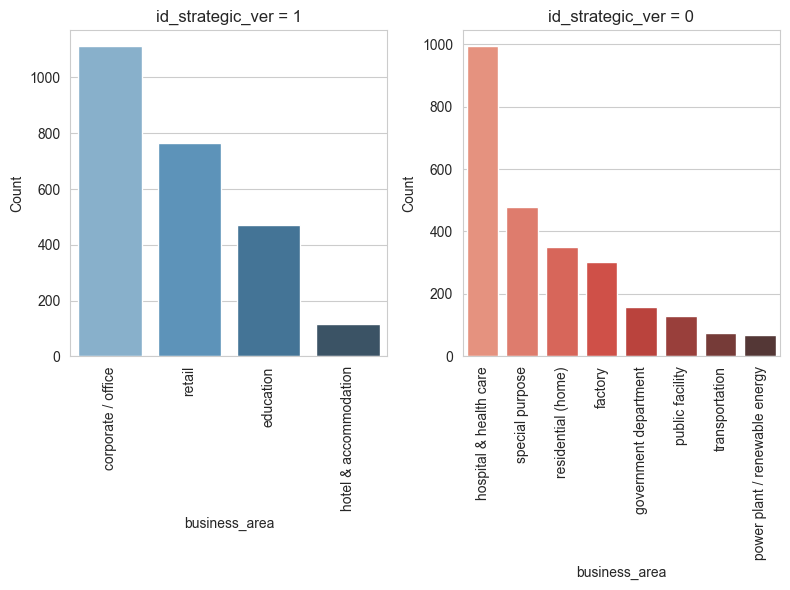

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 설정
sns.set_style("whitegrid")

# business_unit이 'ID'인 데이터만 선택
df_train_id = df_train[df_train['customer_type'] == 'End-user']

# id_strategic_ver 값에 따라 데이터를 분리
df_train_ver_cus_1 = df_train_id[df_train_id['ver_cus'] == 1]
df_train_ver_cus_0 = df_train_id[df_train_id['ver_cus'] == 0]

# business_area별로 id_strategic_ver 개수를 세어 저장
count_ver_cus_1 = df_train_ver_cus_1['business_area'].value_counts()
count_ver_cus_0 = df_train_ver_cus_0['business_area'].value_counts()

# 그래프
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=count_ver_cus_1.index, y=count_ver_cus_1.values, palette="Blues_d")
plt.title('id_strategic_ver = 1')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=count_ver_cus_0.index, y=count_ver_cus_0.values, palette="Reds_d")
plt.title('id_strategic_ver = 0')
plt.xlabel('business_area')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [132]:
print(df_train['ver_cus'].isnull().sum())

0


In [133]:
# ## customer_type

# # 'End-user' 의 customer_type
# end_type = df_train[df_train['customer_type'] == 'End-user']

# ## 그룹별 데이터셋 생성 ##

# # hotel & accommodation 사업영역
# end_ho = end_type[end_type['business_area'] == 'hotel & accommodation']

# # corporate / office 사업영역
# end_co = end_type[end_type['business_area'] == 'corporate / office']

# # retail 사업영역
# end_re = end_type[end_type['business_area'] == 'retail']

# # education 사업영역
# end_ed = end_type[end_type['business_area'] == 'education']

# # 이외의 사업영역
# end_etc = end_type[(end_type['business_area'] != 'hotel & accommodation') & (end_type['business_area'] != 'corporate / office') & (end_type['business_area'] != 'retail') & (end_type['business_area'] != 'education')]


# # ver_1
# ver_1 = df_train[df_train['ver_cus'] == 1]

# # ver_0
# ver_0 = df_train[df_train['ver_cus'] == 0]


# ## 비율 계산 ##

# # end_ho 인 경우의 전환 고객 비율 계산
# end_ho_ratio = end_ho['is_converted'].mean()

# # end_co 인 경우의 전환 고객 비율 계산
# end_co_ratio = end_co['is_converted'].mean()

# # end_re 인 경우의 전환 고객 비율 계산
# end_re_ratio = end_re['is_converted'].mean()

# # end_ed 인 경우의 전환 고객 비율 계산
# end_ed_ratio = end_ed['is_converted'].mean()

# # end_etc_ed 인 경우의 전환 고객 비율 계산
# end_etc_ratio = end_etc['is_converted'].mean()


# # ver_1 인 경우의 전환 고객 비율 계산
# ver_1_ratio = ver_1['is_converted'].mean()

# # ver_0 인 경우의 전환 고객 비율 계산
# ver_0_ratio = ver_0['is_converted'].mean()

# ## 결과 출력 ##
# print("end_ho_ratio :", end_ho_ratio)
# print("end_co_ratio :", end_co_ratio)
# print("end_re_ratio :", end_re_ratio)
# print("end_ed_ratio :", end_ed_ratio)
# print("end_etc_ratio :", end_etc_ratio)

# print("ver_1_ratio :", ver_1_ratio)
# print("ver_0_ratio :", ver_0_ratio)

In [134]:
# import numpy as np

# # 조건에 따라 새로운 열 생성
# conditions = [
#     (df_train['customer_type'] == 'End-user') & (df_train['business_area'] == 'hotel & accommodation'),
#     (df_train['customer_type'] == 'End-user') & (df_train['business_area'] == 'corporate / office'),
#     (df_train['customer_type'] == 'End-user') & (df_train['business_area'] == 'retail'),
#     (df_train['customer_type'] == 'End-user') & (df_train['business_area'] == 'education'),

#     (df_train['ver_cus'] == 0)
# ]

# choices = [0.6581, 0.1536, 0.1137, 0.1547, 0.0782]

# # np.select를 사용하여 새로운 열 생성
# df_train['ver_cus_plus_column'] = np.select(conditions, choices, default=0)

# # 결과 확인
# df_train['ver_cus_plus_column'].value_counts()

In [135]:
# import numpy as np

# # 조건에 따라 새로운 열 생성
# conditions = [
#     (df_test['customer_type'] == 'End-user') & (df_test['business_area'] == 'hotel & accommodation'),
#     (df_test['customer_type'] == 'End-user') & (df_test['business_area'] == 'corporate / office'),
#     (df_test['customer_type'] == 'End-user') & (df_test['business_area'] == 'retail'),
#     (df_test['customer_type'] == 'End-user') & (df_test['business_area'] == 'education'),

#     (df_test['ver_cus'] == 0)
# ]

# choices = [0.6581, 0.1536, 0.1137, 0.1547, 0.0782]

# # np.select를 사용하여 새로운 열 생성
# df_test['ver_cus_plus_column'] = np.select(conditions, choices, default=0)

# # 결과 확인
# df_test['ver_cus_plus_column'].value_counts()

In [136]:
# df_train = df_train.drop(['ver_cus'], axis=1)
# df_test = df_test.drop(['ver_cus'], axis=1)

#### 23. ver_pro

특정 Vertical Level 1(사업영역) 이면서   
특정 Product Category(제품 유형)인   
경우에 대한 가중치

In [137]:
df_train['ver_pro'].value_counts()

ver_pro
0    56286
1     3013
Name: count, dtype: int64

In [138]:
df_test['product_category'].value_counts()

product_category
Unknown                    1858
Air Conditioner            1449
Digital Signage            1212
Others                      287
TV and Display              236
Heating and Ventilation     197
Medical Display              32
Name: count, dtype: int64

In [139]:
find_ver_cus = df_train[df_train['ver_pro'] == 1]
find_ver_cus['product_category'].value_counts()

product_category
Digital Signage    2737
TV and Display      273
Others                3
Name: count, dtype: int64

In [140]:
find_ver_cus = df_train[df_train['ver_pro'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       1566
retail                   1188
hotel & accommodation     259
Name: count, dtype: int64

In [141]:
find_ver_cus = df_test[df_test['ver_pro'] == 1]
find_ver_cus['product_category'].value_counts()

product_category
Digital Signage    334
TV and Display      95
Name: count, dtype: int64

In [142]:
find_ver_cus = df_test[df_test['ver_pro'] == 1]
find_ver_cus['business_area'].value_counts()

business_area
corporate / office       201
retail                   133
hotel & accommodation     95
Name: count, dtype: int64

In [143]:
# ## 그룹별 데이터셋 생성 ##

# a1 = df_train[(df_train['business_area'] == 'retail') & (df_train['product_category'] == 'Digital Signage')]
# a2 = df_train[(df_train['business_area'] == 'retail') & (df_train['product_category'] == 'TV and Display')]

# a3 = df_train[(df_train['business_area'] == 'corporate / office') & (df_train['product_category'] == 'Digital Signage')]
# a4 = df_train[(df_train['business_area'] == 'corporate / office') & (df_train['product_category'] == 'TV and Display')]

# a5 = df_train[(df_train['business_area'] == 'hotel & accommodation') & (df_train['product_category'] == 'Digital Signage')]
# a6 = df_train[(df_train['business_area'] == 'hotel & accommodation') & (df_train['product_category'] == 'TV and Display')]

# # ver_pro_1
# ver_pro_1 = df_train[df_train['ver_pro'] == 1]

# # ver_pro_0
# ver_pro_0 = df_train[df_train['ver_pro'] == 0]


# ## 비율 계산 ##

# # a1 인 경우의 전환 고객 비율 계산
# a1_ratio = a1['is_converted'].mean()

# # a2 인 경우의 전환 고객 비율 계산
# a2_ratio = a2['is_converted'].mean()

# # a3 인 경우의 전환 고객 비율 계산
# a3_ratio = a3['is_converted'].mean()

# # a4 인 경우의 전환 고객 비율 계산
# a4_ratio = a4['is_converted'].mean()

# # a5 인 경우의 전환 고객 비율 계산
# a5_ratio = a5['is_converted'].mean()

# # a6 인 경우의 전환 고객 비율 계산
# a6_ratio = a6['is_converted'].mean()


# # ver_pro_1 인 경우의 전환 고객 비율 계산
# ver_pro_1_ratio = ver_pro_1['is_converted'].mean()

# # ver_pro_0 인 경우의 전환 고객 비율 계산
# ver_pro_0_ratio = ver_pro_0['is_converted'].mean()

# ## 결과 출력 ##
# print("a1_ratio :", a1_ratio)
# print("a2_ratio :", a2_ratio)
# print("a3_ratio :", a3_ratio)
# print("a4_ratio :", a4_ratio)
# print("a5_ratio :", a5_ratio)
# print("a6_ratio :", a6_ratio)

# print("ver_pro_1_ratio :", ver_pro_1_ratio)
# print("ver_pro_0_ratio :", ver_pro_0_ratio)

In [144]:
# import numpy as np

# # 조건에 따라 새로운 열 생성
# conditions = [

#     (df_train['business_area'] == 'retail') & (df_train['product_category'] == 'Digital Signage'),
#     (df_train['business_area'] == 'retail') & (df_train['product_category'] == 'TV and Display'),

#     (df_train['business_area'] == 'corporate / office') & (df_train['product_category'] == 'Digital Signage'),
#     (df_train['business_area'] == 'corporate / office') & (df_train['product_category'] == 'TV and Display'),

#     (df_train['business_area'] == 'hotel & accommodation') & (df_train['product_category'] == 'Digital Signage'),
#     (df_train['business_area'] == 'hotel & accommodation') & (df_train['product_category'] == 'TV and Display'),

#     (df_train['ver_pro'] == 0)

# ]

# choices = [0.080, 0.0377, 0.1038, 0.0472, 0.0228, 0.1064, 0.0812]

# # np.select를 사용하여 새로운 열 생성
# df_train['ver_pro_plus_column'] = np.select(conditions, choices, default=0)

# # 결과 확인
# df_train['ver_pro_plus_column'].value_counts()

In [145]:
# import numpy as np

# # 조건에 따라 새로운 열 생성
# conditions = [

#     (df_test['business_area'] == 'retail') & (df_test['product_category'] == 'Digital Signage'),
#     (df_test['business_area'] == 'retail') & (df_test['product_category'] == 'TV and Display'),

#     (df_test['business_area'] == 'corporate / office') & (df_test['product_category'] == 'Digital Signage'),
#     (df_test['business_area'] == 'corporate / office') & (df_test['product_category'] == 'TV and Display'),

#     (df_test['business_area'] == 'hotel & accommodation') & (df_test['product_category'] == 'Digital Signage'),
#     (df_test['business_area'] == 'hotel & accommodation') & (df_test['product_category'] == 'TV and Display'),

#     (df_test['ver_pro'] == 0)

# ]

# choices = [0.080, 0.0377, 0.1038, 0.0472, 0.0228, 0.1064, 0.0812]

# # np.select를 사용하여 새로운 열 생성
# df_test['ver_pro_plus_column'] = np.select(conditions, choices, default=0)

# # 결과 확인
# df_test['ver_pro_plus_column'].value_counts()

In [146]:
print(df_train['ver_pro'].isnull().sum())

0


In [147]:
df_train = df_train.drop(['ver_pro'], axis=1)
df_test = df_test.drop(['ver_pro'], axis=1)

#### 24. ver_win_rate_x

전체 Lead 중에서 Vertical을 기준으로  
[a] Vertical 수 비율  
[b] Vertical 별 Lead 수 대비 영업 전환 성공 비율 값  
[a] , [b] 를 곱한 값

In [148]:
df_train['ver_win_rate_x'].value_counts()

ver_win_rate_x
0.003079    4097
0.001183    3011
0.000717    2013
0.000543    1929
0.000298    1818
0.000572    1727
0.000060    1199
0.000215    1035
0.000097     650
0.000026     519
0.000013     306
0.000002     113
Name: count, dtype: int64

In [149]:
df_train['ver_win_rate_x'].value_counts().sum()

18417

결측치 확인

In [150]:
print(df_train['ver_win_rate_x'].isnull().sum())

40882


In [151]:
sd = df_train[df_train['business_area'].isnull()]
total_count = sd['business_unit'].size
total_count

40882

결측값 동일 -> 구할수 없는 값에 대해서는 그냥 빈값으로 두어서 제공된 형태라 따로 계산할 필요 없어 보임

In [152]:
# 'com_reg_ver_win_rate' 변수에서 NaN 값을 0으로 대체
df_train['ver_win_rate_x'] = df_train['ver_win_rate_x'].fillna(0)
df_test['ver_win_rate_x'] = df_test['ver_win_rate_x'].fillna(0)

In [153]:
print(df_train['ver_win_rate_x'].isnull().sum())

0


#### 25. ver_win_ratio_per_bu

특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산

In [154]:
df_train['ver_win_ratio_per_bu'].value_counts()

ver_win_ratio_per_bu
0.064566    2460
0.049840    2028
0.020121    1365
0.048630    1356
0.026846    1278
0.064070    1075
0.071345     984
0.011583     788
0.022634     713
0.060924     540
0.079412     421
0.036913     403
0.035484     385
0.031579     271
0.053571     216
0.051471     210
0.028777     200
0.022727     173
0.128571     156
0.131148     148
0.227273      62
0.285714      43
0.034483      29
Name: count, dtype: int64

In [155]:
df_train['business_area'].value_counts()

business_area
corporate / office                4097
retail                            3011
hotel & accommodation             2013
special purpose                   1929
residential (home)                1818
education                         1727
hospital & health care            1199
factory                           1035
government department              650
public facility                    519
transportation                     306
power plant / renewable energy     113
Name: count, dtype: int64

결측값 확인

In [156]:
print(df_train['ver_win_ratio_per_bu'].isnull().sum())

43995


In [157]:
# 결측값 0값으로 대체
df_train['ver_win_ratio_per_bu'].fillna(0, inplace=True)
df_test['ver_win_ratio_per_bu'].fillna(0, inplace=True)

print(df_train['ver_win_ratio_per_bu'].isnull().sum())

0


#### 26. business_area

고객의 사업 영역

In [158]:
df_train['business_area'].value_counts()

business_area
corporate / office                4097
retail                            3011
hotel & accommodation             2013
special purpose                   1929
residential (home)                1818
education                         1727
hospital & health care            1199
factory                           1035
government department              650
public facility                    519
transportation                     306
power plant / renewable energy     113
Name: count, dtype: int64

In [159]:
print(df_train['business_area'].isnull().sum())

40882


In [160]:
# 결측값 'unknown' 값으로 대체
df_train['business_area'].fillna('unknown', inplace=True)
df_test['business_area'].fillna('unknown', inplace=True)

print(df_train['business_area'].isnull().sum())

0


#### 27. business_subarea

고객의 세부 사업 영역

In [161]:
df_train['business_subarea'].value_counts()

business_subarea
Others                                     1740
Other Stores                                280
Hospital                                    267
Manufacturing Factory / Plant               196
Construction                                191
Higher Education (College & University)     186
Engineering                                 183
Villa / Single-Family Home                  172
Apartment                                   163
Electronics & Telco                         135
K12 Kindergarten & Schools                  134
IT/Software                                 132
Advertising                                 120
Institute & Academy                         105
Clinic                                      104
Mixed-use (Multi Complex)                   104
Fashion                                      98
General Government Office                    91
Cruise                                       80
General Hospital                             63
Consulting             

In [162]:
print(df_train['business_subarea'].isnull().sum())

53773


In [163]:
# 결측값 'Unknown' 값으로 대체
df_train['business_subarea'].fillna('Unknown', inplace=True)
df_test['business_subarea'].fillna('Unknown', inplace=True)

print(df_train['business_subarea'].isnull().sum())

0


#### 28. lead_owner

영업 담당자 이름

In [164]:
df_train['lead_owner'].value_counts()

lead_owner
174     4627
175     4120
97      2499
23      2453
194     2208
42      1215
96       981
185      880
363      839
115      734
38       693
125      690
402      490
108      487
124      468
816      464
341      462
167      459
100      457
0        429
68       427
16       413
487      405
176      374
40       355
342      346
662      327
422      326
27       317
359      305
205      304
39       304
15       301
279      294
441      281
25       272
155      271
103      270
233      265
374      257
405      246
393      238
589      237
46       235
21       228
831      227
78       223
436      219
148      216
642      215
153      215
694      213
654      208
384      204
187      200
45       198
788      195
638      180
717      171
29       168
414      165
391      163
81       153
285      151
214      151
344      150
71       150
388      148
225      148
166      146
480      146
798      145
435      145
20       144
234      143
423      142
2

In [165]:
print(df_train['lead_owner'].isnull().sum())

0


#### 29. is_converted (Target)

영업 성공 여부
True일 시 성공 (True or False 값을 가짐)

In [166]:
df_train['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

### 레이블 인코딩

In [167]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

# df_train과 df_test를 복사하여 새로운 데이터프레임을 생성
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# 레이블 인코딩 적용
for col in label_columns:
    encoder = LabelEncoder()
    combined_data = pd.concat([df_train_encoded[col], df_test_encoded[col]])
    encoder.fit(combined_data)
    df_train_encoded[col] = encoder.transform(df_train_encoded[col])
    df_test_encoded[col] = encoder.transform(df_test_encoded[col])


변수 ' 3. com_reg_ver_win_rate ' 에 대한 결측치 처리

In [168]:
# 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

# 데이터에서 결측치가 없는 행과 결측치가 있는 행 분리
train_data = df_train_encoded[df_train_encoded['com_reg_ver_win_rate'].notna()]
test_data = df_train_encoded[df_train_encoded['com_reg_ver_win_rate'].isna()]

# 'com_reg_ver_win_rate'를 예측하는 데 사용할 피처 선택
features = ['business_area', 'business_unit', 'customer_country']

# 훈련 데이터와 테스트 데이터 준비
X_train = train_data[features]
y_train = train_data['com_reg_ver_win_rate']
X_test = test_data[features]

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

# 모델을 사용해 결측치 예측
predicted_values = model.predict(X_test)

# 예측값으로 결측치 대체
df_train_encoded.loc[df_train_encoded['com_reg_ver_win_rate'].isna(), 'com_reg_ver_win_rate'] = predicted_values


In [169]:
# 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor

# 데이터에서 결측치가 없는 행과 결측치가 있는 행 분리
train_data = df_test_encoded[df_test_encoded['com_reg_ver_win_rate'].notna()]
test_data = df_test_encoded[df_test_encoded['com_reg_ver_win_rate'].isna()]

# 'com_reg_ver_win_rate'를 예측하는 데 사용할 피처 선택
features = ['business_area', 'business_unit', 'customer_country']

# 훈련 데이터와 테스트 데이터 준비
X_train = train_data[features]
y_train = train_data['com_reg_ver_win_rate']
X_test = test_data[features]

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

# 모델을 사용해 결측치 예측
predicted_values = model.predict(X_test)

# 예측값으로 결측치 대체
df_test_encoded.loc[df_test_encoded['com_reg_ver_win_rate'].isna(), 'com_reg_ver_win_rate'] = predicted_values


In [170]:
print(df_test_encoded['com_reg_ver_win_rate'].isnull().sum())

0


In [171]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   int32  
 3   business_unit            5271 non-null   int32  
 4   com_reg_ver_win_rate     5271 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            5271 non-null   int32  
 7   enterprise               5271 non-null   int32  
 8   historical_existing_cnt  5271 non-null   float64
 9   id_strategic_ver         5271 non-null   float64
 10  it_strategic_ver         5271 non-null   float64
 11  idit_strategic_ver       5271 non-null   float64
 12  customer_job             5271 non-null   int32  
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

### 파생변수 생성

In [172]:
# # 변수 'customer_type_weight' 생성
# df_train_encoded['business_unit_weight'] = df_train_encoded['idit_plus_column'] * df_train_encoded['business_unit']
# df_test_encoded['business_unit_weight'] = df_test_encoded['idit_plus_column'] / df_test_encoded['business_unit']

# # 변수 'product_category_weight' 생성
# df_train_encoded['business_area_weight'] = df_train_encoded['ver_cus_plus_column'] * df_train_encoded['business_area']
# df_test_encoded['business_area_weight'] = df_test_encoded['ver_cus_plus_column'] * df_test_encoded['business_area']

# # 변수 'bussiness_unit_idit_weight' 생성
# df_train_encoded['product_category_weight'] = df_train_encoded['ver_pro_plus_column'] * df_train_encoded['product_category']
# df_test_encoded['product_category_weight'] = df_test_encoded['ver_pro_plus_column'] * df_test_encoded['product_category']

In [173]:
# df_train_encoded = df_train_encoded.drop(['idit_plus_column', 'ver_cus_plus_column', 'ver_pro_plus_column'], axis=1)
# df_test_encoded = df_test_encoded.drop(['idit_plus_column', 'ver_cus_plus_column', 'ver_pro_plus_column'], axis=1)

### 변수중요도

In [175]:
import xgboost as xgb
import pandas as pd

# 데이터셋을 훈련 세트와 테스트 세트로 나누기
X = df_train_encoded.drop(columns=['is_converted'])
y = df_train_encoded['is_converted']

# 80%를 훈련 세트로, 20%를 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 데이터셋 준비
dtrain = xgb.DMatrix(X_train, label=y_train)
param = {'max_depth': 6, 'learning_rate': 0.03}
num_round = 200
bst = xgb.train(param, dtrain, num_round)

# 특성 중요도 확인
feature_importance = bst.get_score(importance_type='gain')

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.to_string())


                         Importance
customer_idx              24.899498
business_unit              3.310750
lead_owner                 2.605218
customer_type              2.450512
idit_strategic_ver         2.425882
business_subarea           2.198101
ver_win_rate_x             2.080795
bant_submit                1.807378
response_corporate         1.599047
lead_desc_length           1.411636
com_reg_ver_win_rate       1.166157
historical_existing_cnt    1.060861
id_strategic_ver           0.906152
ver_win_ratio_per_bu       0.898953
business_area              0.815500
customer_country           0.764312
ver_cus                    0.710623
product_category           0.630408
customer_job               0.626056
product_modelname          0.590644
customer_position          0.588364
enterprise                 0.522950
expected_timeline          0.522089
product_subcategory        0.513312
it_strategic_ver           0.480489
inquiry_type               0.423488


### 상관관계 히트맵

In [176]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  int32  
 2   business_unit            59299 non-null  int32  
 3   com_reg_ver_win_rate     59299 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  int32  
 6   enterprise               59299 non-null  int32  
 7   historical_existing_cnt  59299 non-null  float64
 8   id_strategic_ver         59299 non-null  float64
 9   it_strategic_ver         59299 non-null  float64
 10  idit_strategic_ver       59299 non-null  float64
 11  customer_job             59299 non-null  int32  
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             59299 non-null  int32  
 14  product_category      

In [177]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   int32  
 3   business_unit            5271 non-null   int32  
 4   com_reg_ver_win_rate     5271 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            5271 non-null   int32  
 7   enterprise               5271 non-null   int32  
 8   historical_existing_cnt  5271 non-null   float64
 9   id_strategic_ver         5271 non-null   float64
 10  it_strategic_ver         5271 non-null   float64
 11  idit_strategic_ver       5271 non-null   float64
 12  customer_job             5271 non-null   int32  
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

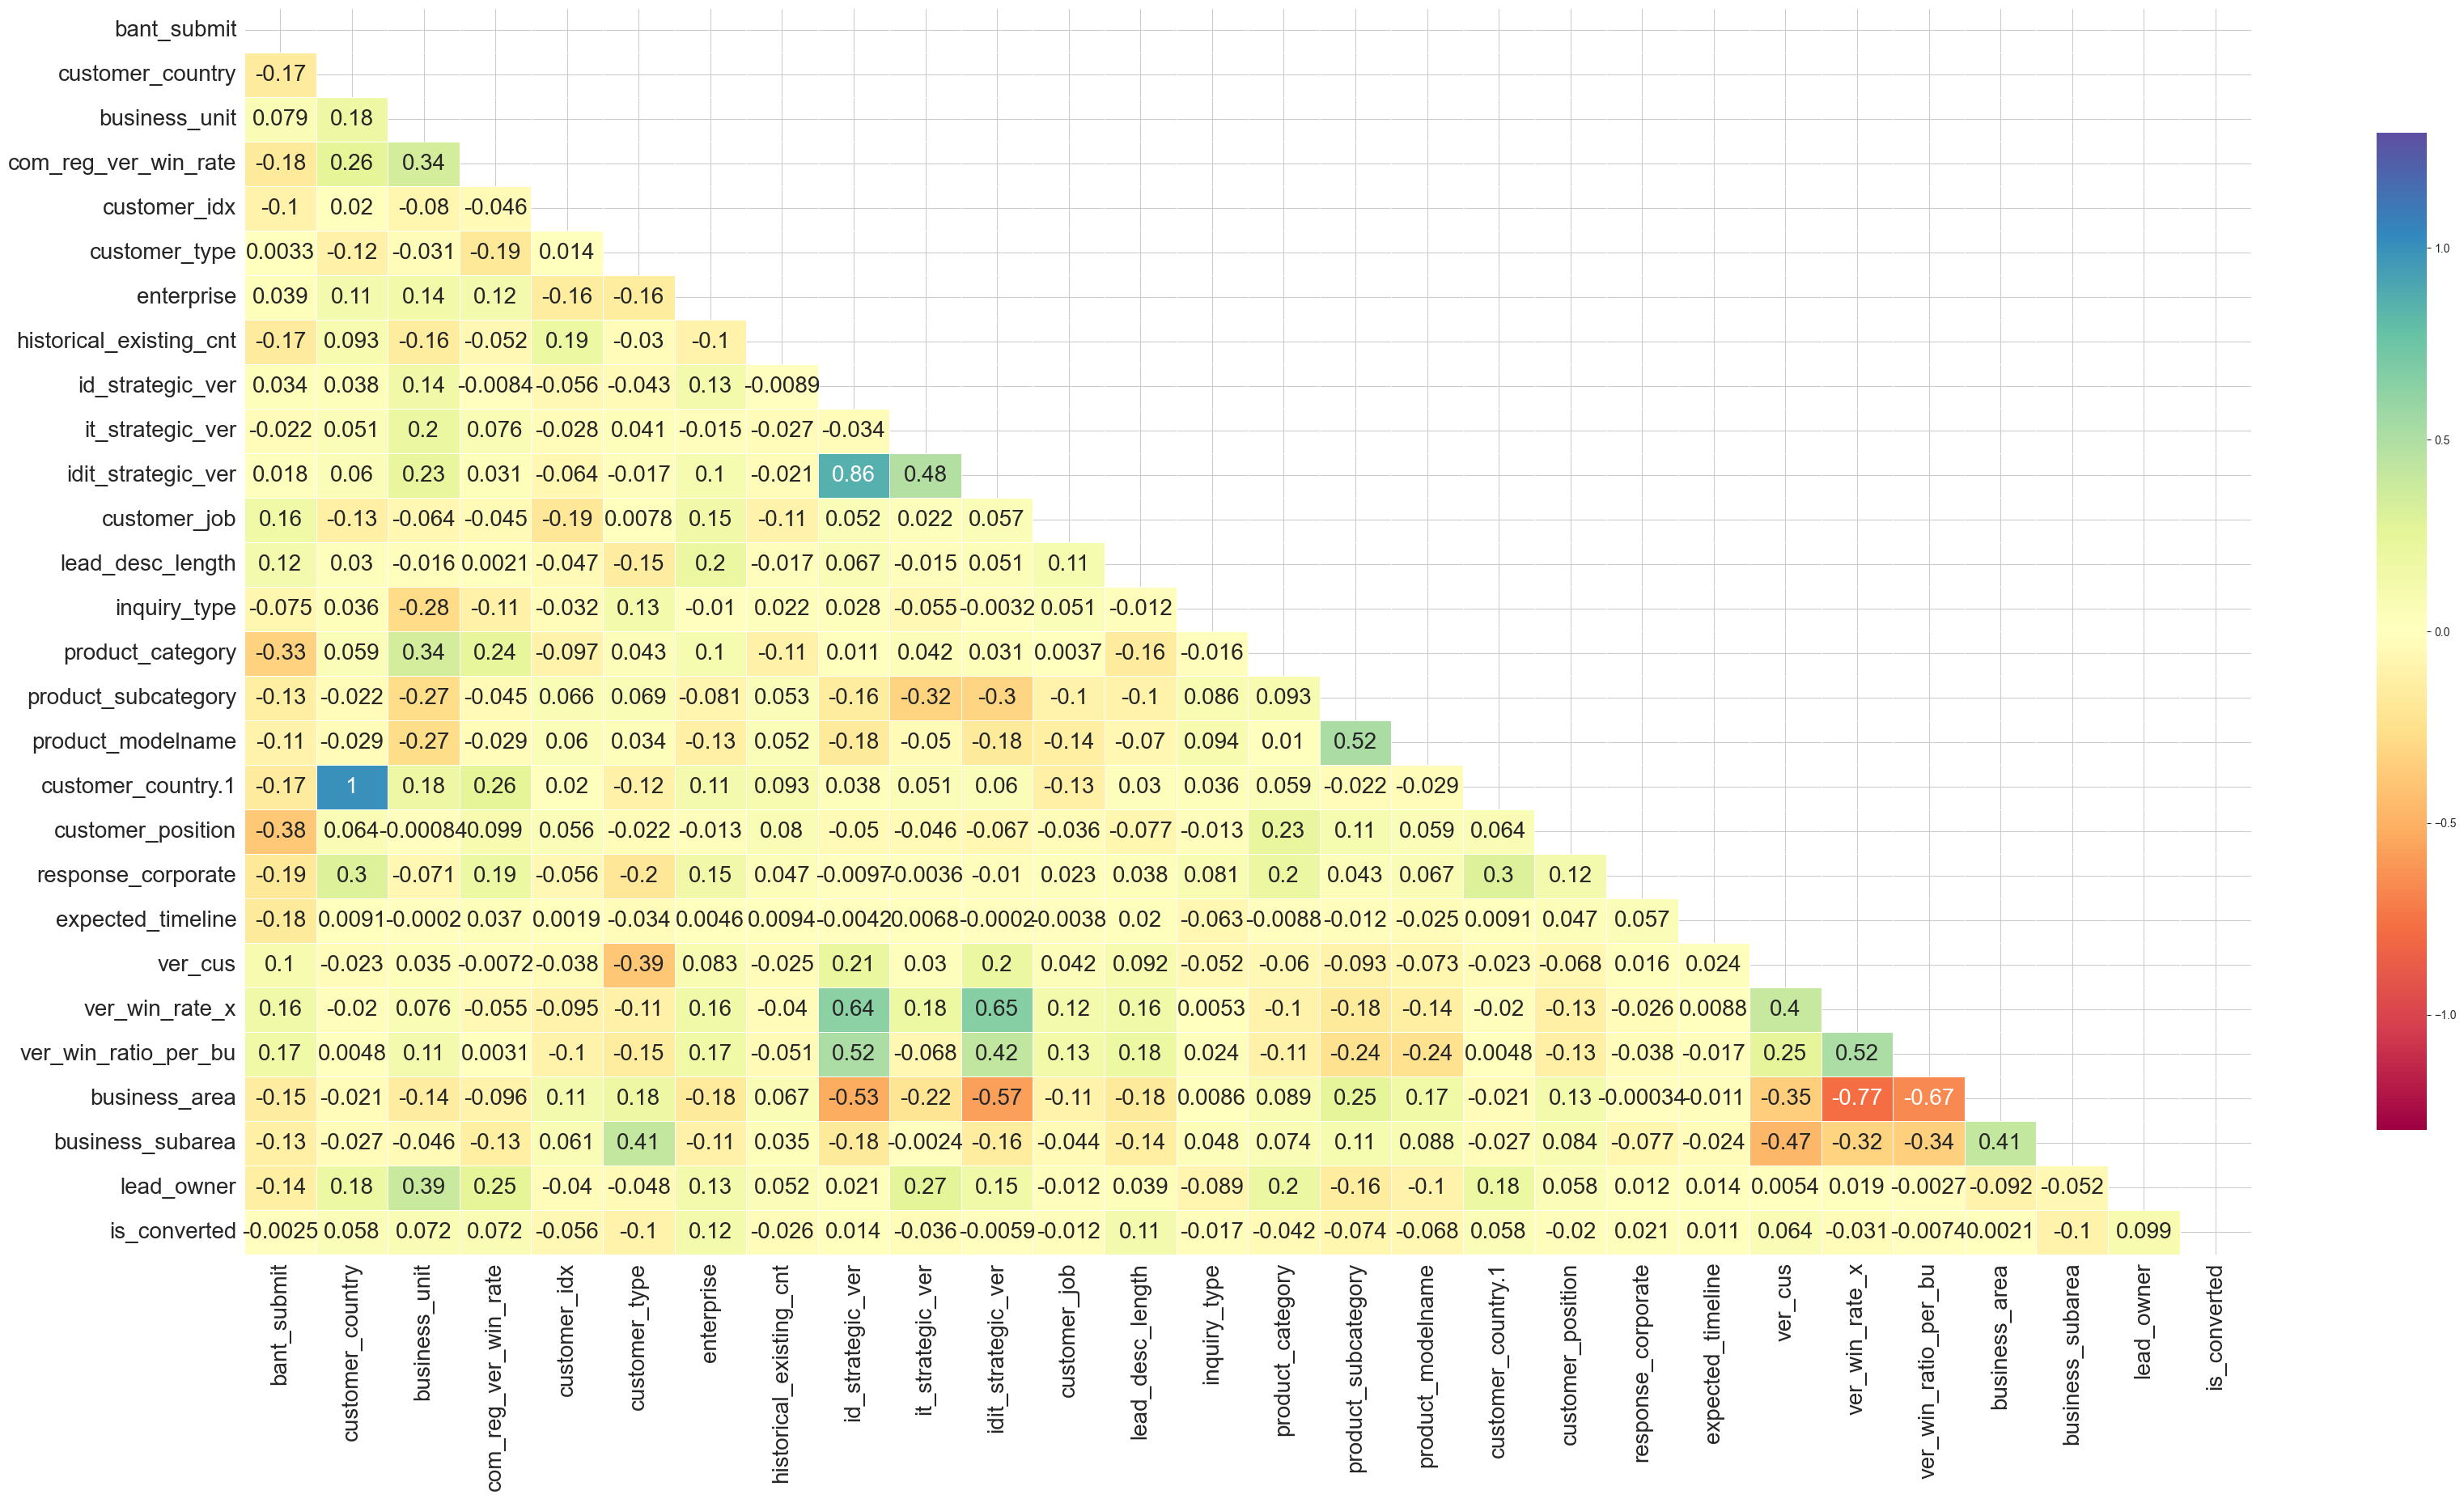

In [178]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask, # 마스크 적용
            annot=True, # 수치(상관관계) 표시
            annot_kws = {'size':20}, # 수치표시 사이즈
            cmap='Spectral', # 색상 변경
            vmin=-1.3, # 색상 팔레트 범위
            vmax=1.3,
            linewidths=.5, # 히트맵의 선 스타일 변경
            cbar_kws={"shrink": .8}) # 히트맵 주변에 색상 바 추가(사이즈 조절 가능)

# 변수 이름의 크기 조절
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


customer_country.1 변수 제거

In [179]:
df_train_encoded = df_train_encoded.drop(['customer_country.1'], axis=1)
df_test_encoded = df_test_encoded.drop(['customer_country.1'], axis=1)

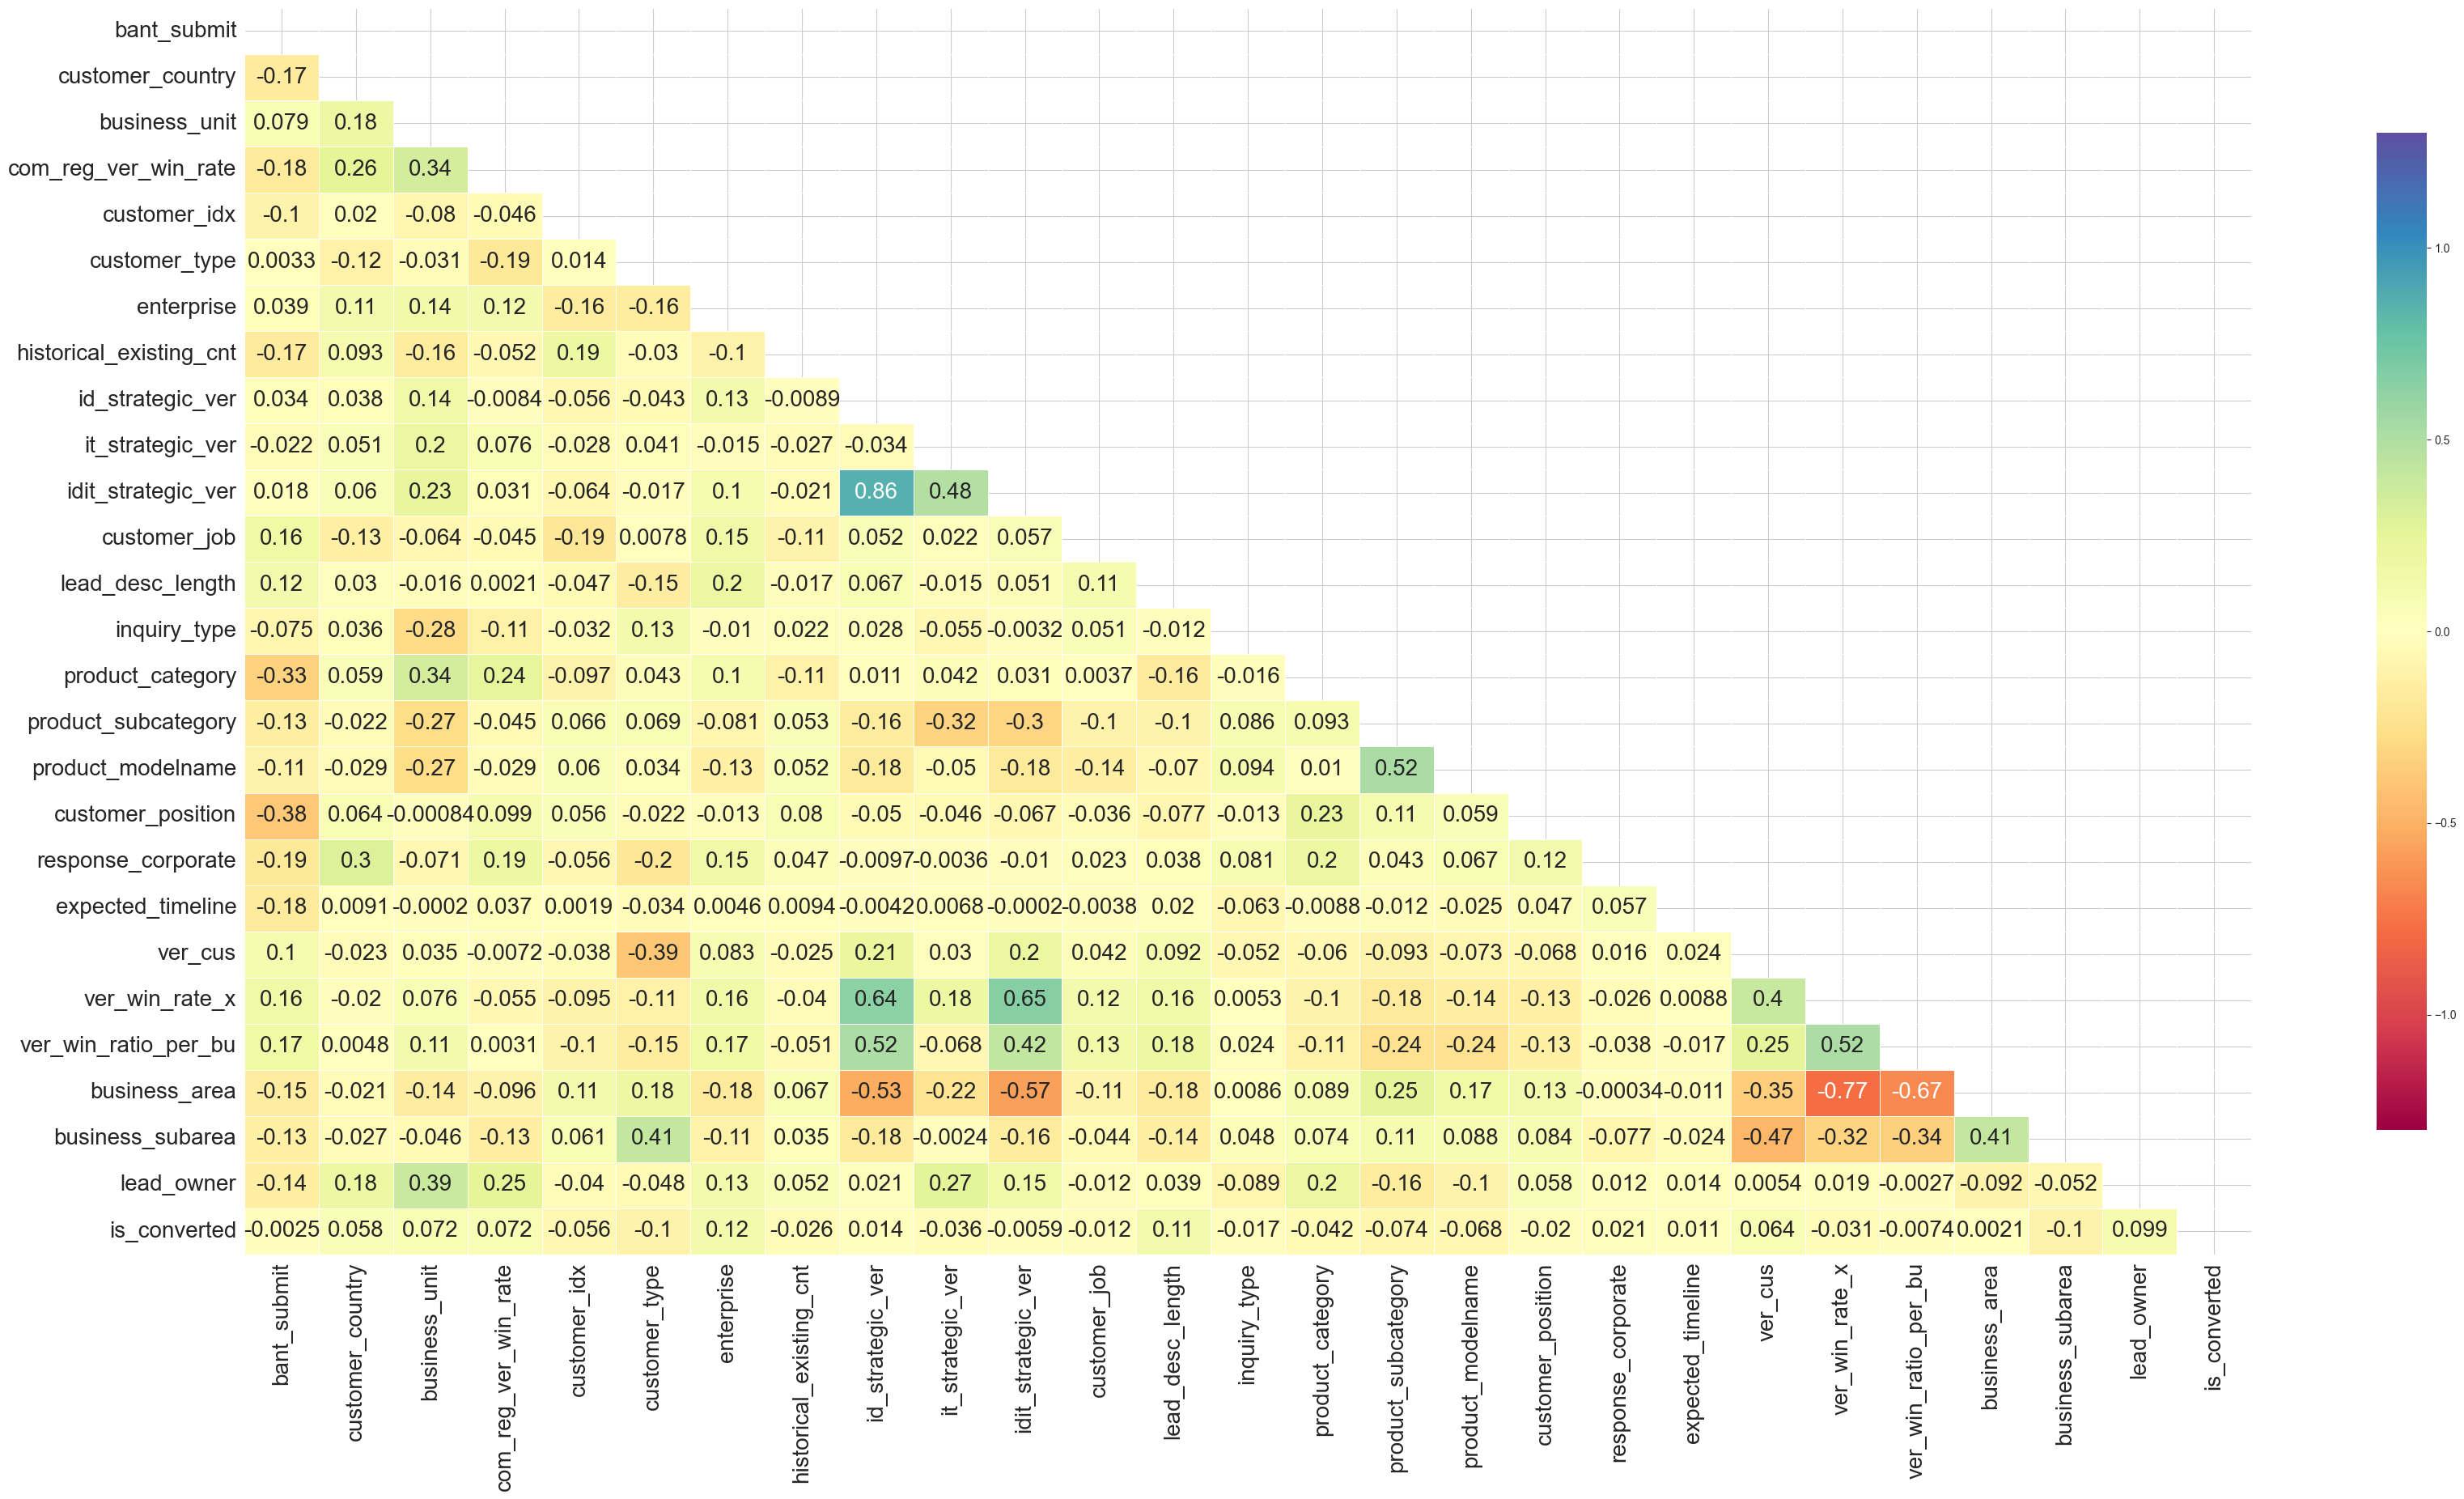

In [180]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask,
            annot=True,
            annot_kws = {'size':20},
            cmap='Spectral',
            vmin=-1.3,
            vmax=1.3,
            linewidths=.5,
            cbar_kws={"shrink": .8})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [182]:
df_train_encoded = df_train_encoded.drop(['business_area'], axis=1)
df_test_encoded = df_test_encoded.drop(['business_area'], axis=1)

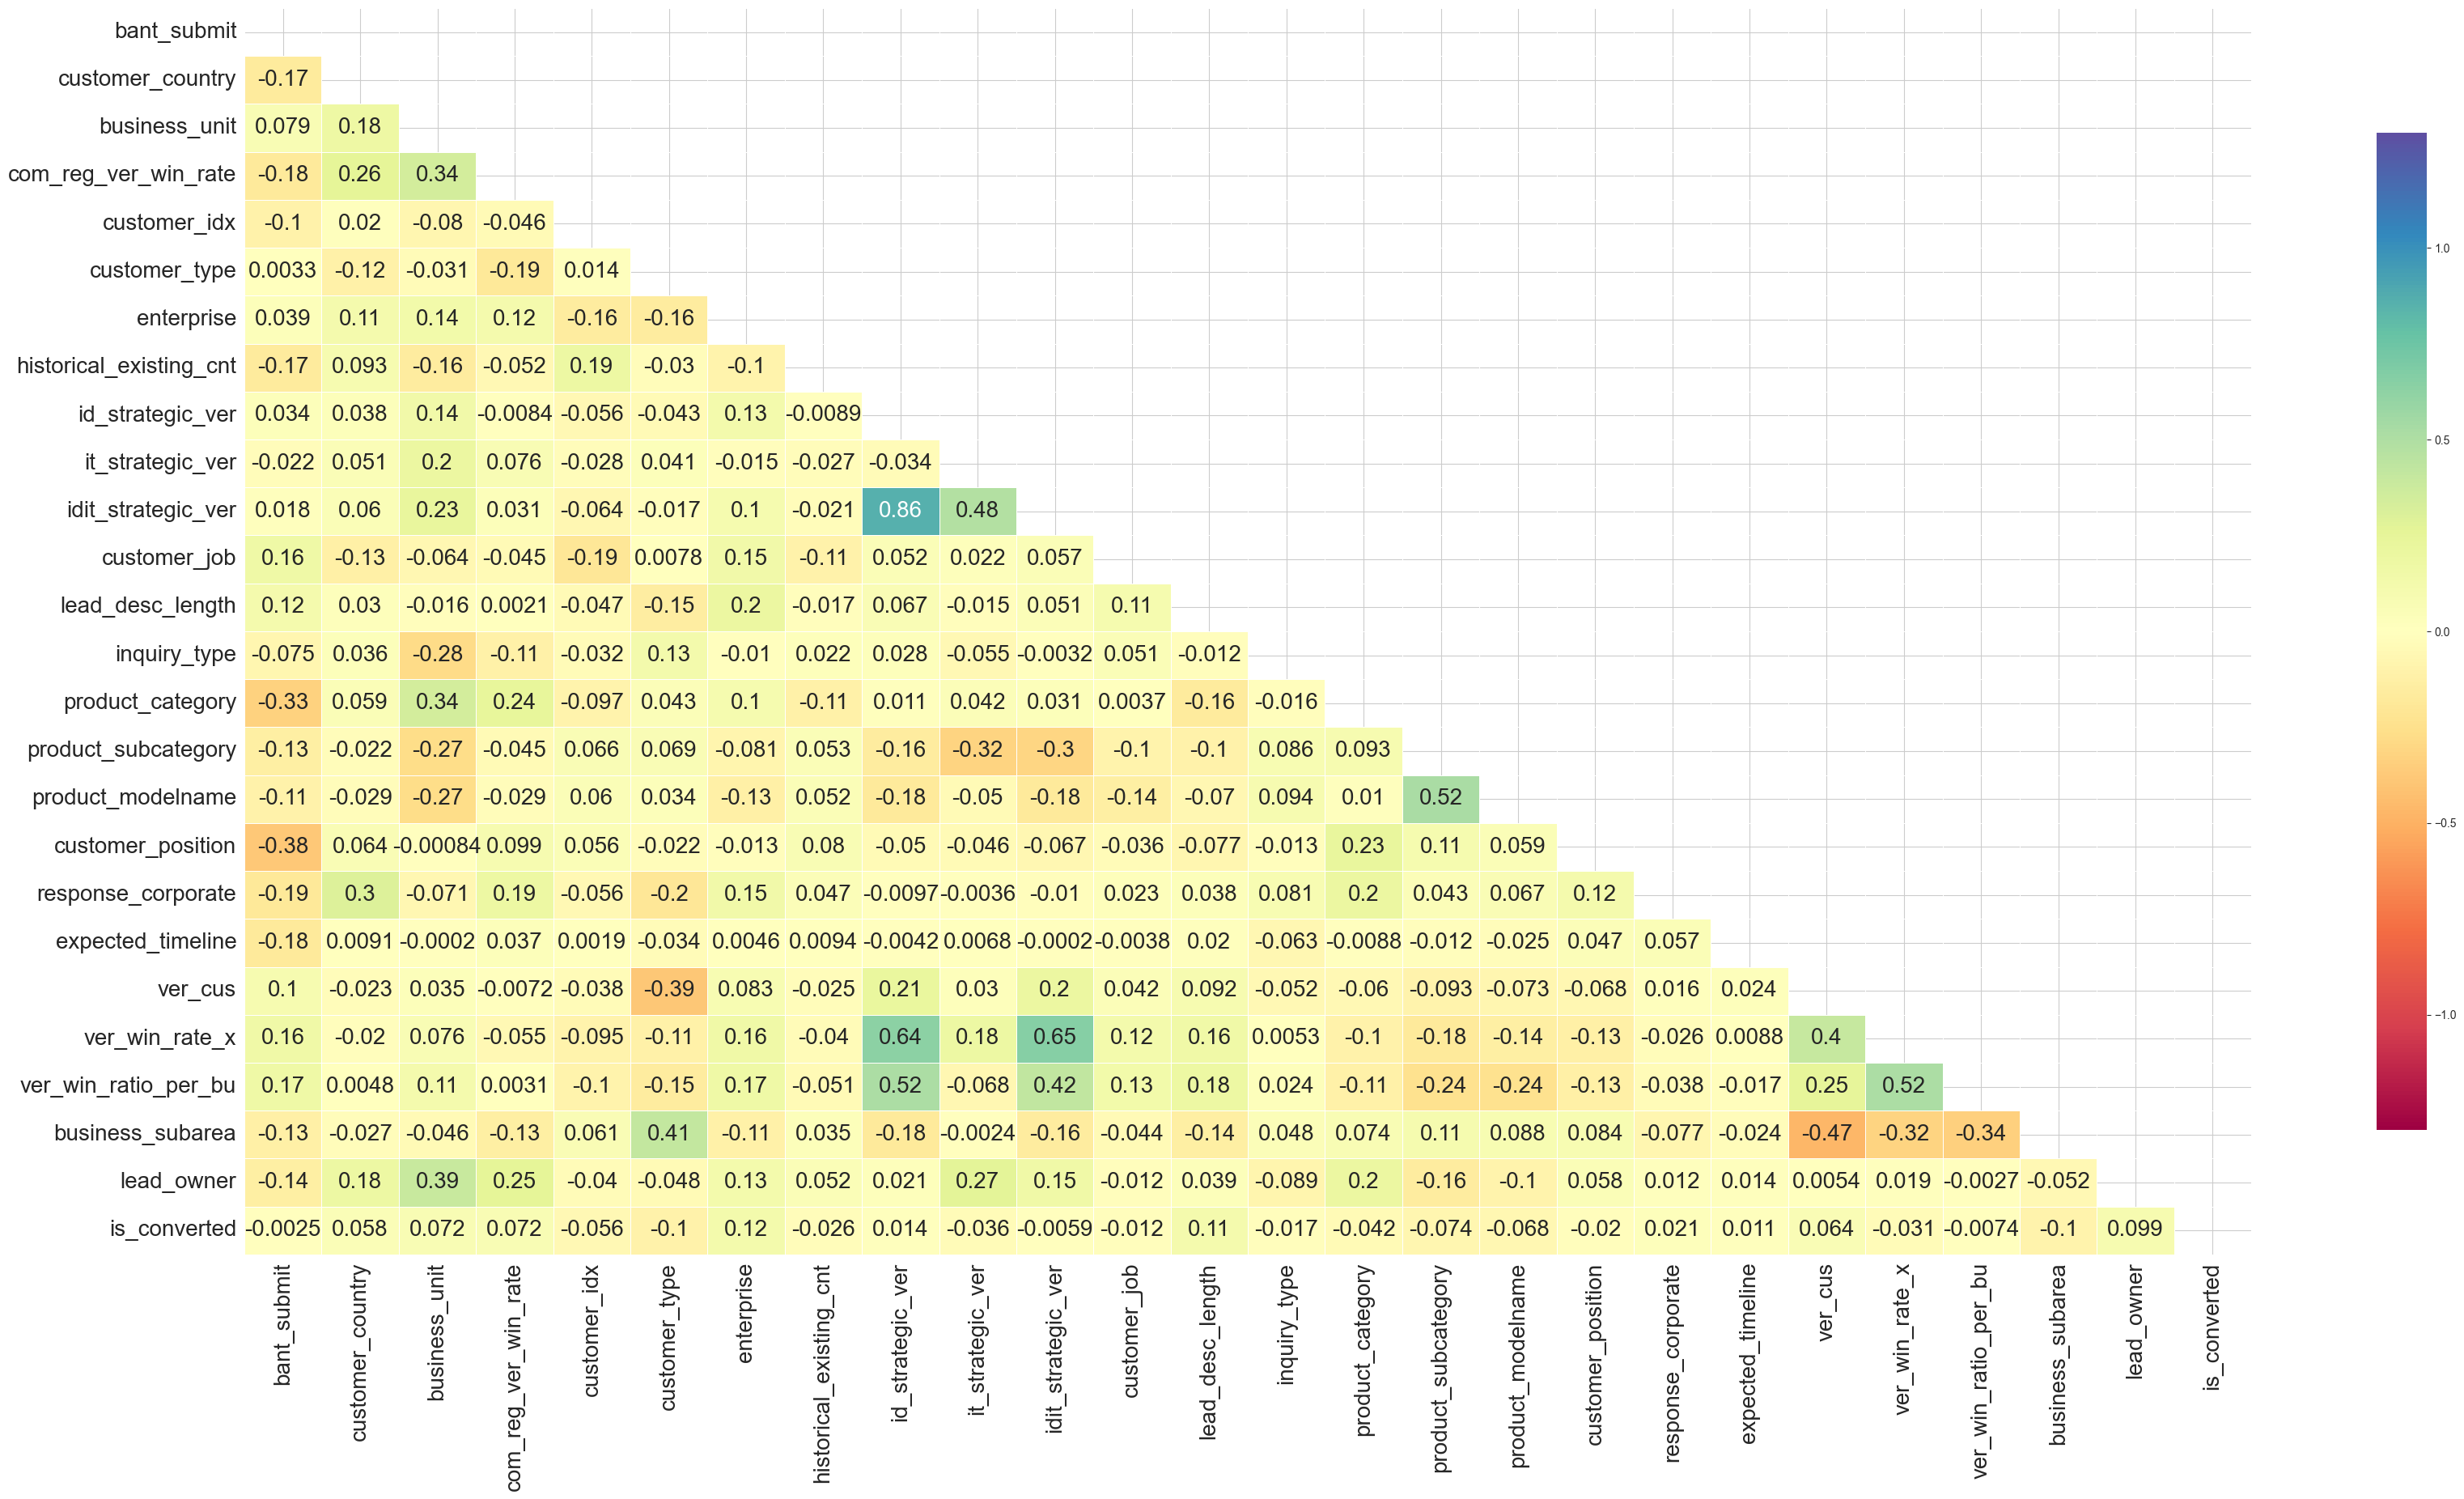

In [183]:
import numpy as np

# 숫자형 변수들 간의 상관관계 계산
corr = df_train_encoded.corr()

# 상관계수 행렬의 상삼각행렬을 마스킹하기 위한 마스크 생성
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵
plt.figure(figsize=(40, 20))

sns.heatmap(corr,
            mask=mask,
            annot=True,
            annot_kws = {'size':20},
            cmap='Spectral',
            vmin=-1.3,
            vmax=1.3,
            linewidths=.5,
            cbar_kws={"shrink": .8})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                 features
0     8.059302              bant_submit
1     6.291113         customer_country
2     4.166102            business_unit
3     1.790753     com_reg_ver_win_rate
4     4.751070             customer_idx
5    12.426172            customer_type
6     1.863300               enterprise
7     1.176206  historical_existing_cnt
8          inf         id_strategic_ver
9          inf         it_strategic_ver
10         inf       idit_strategic_ver
11    2.296851             customer_job
12    1.530915         lead_desc_length
13   52.948673             inquiry_type
14    3.700358         product_category
15   29.870659      product_subcategory
16   31.336585        product_modelname
17    7.029983        customer_position
18    7.600969       response_corporate
19    8.837780        expected_timeline
20    1.524632                  ver_cus
21    2.830506           ver_win_rate_x
22    2.108787     ver_win_ratio_per_bu
23   48.709562         business_subarea


In [185]:
df_train_encoded = df_train_encoded.drop(['id_strategic_ver'], axis=1)
df_test_encoded = df_test_encoded.drop(['id_strategic_ver'], axis=1)

In [186]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                 features
0     8.059302              bant_submit
1     6.291113         customer_country
2     4.166102            business_unit
3     1.790753     com_reg_ver_win_rate
4     4.751070             customer_idx
5    12.426172            customer_type
6     1.863300               enterprise
7     1.176206  historical_existing_cnt
8     1.724229         it_strategic_ver
9     2.823864       idit_strategic_ver
10    2.296851             customer_job
11    1.530915         lead_desc_length
12   52.948673             inquiry_type
13    3.700358         product_category
14   29.870659      product_subcategory
15   31.336585        product_modelname
16    7.029983        customer_position
17    7.600969       response_corporate
18    8.837780        expected_timeline
19    1.524632                  ver_cus
20    2.830506           ver_win_rate_x
21    2.108787     ver_win_ratio_per_bu
22   48.709562         business_subarea
23    3.026070               lead_owner


In [187]:
df_train_encoded = df_train_encoded.drop(['product_modelname', 'business_subarea'], axis=1)
df_test_encoded = df_test_encoded.drop(['product_modelname', 'business_subarea'], axis=1)

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                 features
0     7.824132              bant_submit
1     6.273072         customer_country
2     4.027290            business_unit
3     1.771454     com_reg_ver_win_rate
4     4.670573             customer_idx
5    11.280416            customer_type
6     1.856741               enterprise
7     1.174583  historical_existing_cnt
8     1.678219         it_strategic_ver
9     2.816793       idit_strategic_ver
10    2.271943             customer_job
11    1.529583         lead_desc_length
12   41.868263             inquiry_type
13    3.699621         product_category
14   20.613210      product_subcategory
15    6.849528        customer_position
16    7.541725       response_corporate
17    8.611078        expected_timeline
18    1.457137                  ver_cus
19    2.808818           ver_win_rate_x
20    2.075952     ver_win_ratio_per_bu
21    3.024165               lead_owner


In [189]:
df_train_encoded = df_train_encoded.drop(['inquiry_type', 'product_subcategory'], axis=1)
df_test_encoded = df_test_encoded.drop(['inquiry_type', 'product_subcategory'], axis=1)

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
y = df_train_encoded['is_converted']
X = df_train_encoded.drop(['is_converted'], axis=1)

# 각 독립 변수의 VIF를 계산합니다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor                 features
0     6.265502              bant_submit
1     5.925369         customer_country
2     3.801387            business_unit
3     1.765810     com_reg_ver_win_rate
4     4.392411             customer_idx
5     8.749193            customer_type
6     1.854168               enterprise
7     1.173254  historical_existing_cnt
8     1.607353         it_strategic_ver
9     2.794497       idit_strategic_ver
10    2.249995             customer_job
11    1.525658         lead_desc_length
12    3.493495         product_category
13    6.200922        customer_position
14    7.093569       response_corporate
15    7.739609        expected_timeline
16    1.435381                  ver_cus
17    2.792884           ver_win_rate_x
18    2.009928     ver_win_ratio_per_bu
19    2.991994               lead_owner


### 최종적으로 선정된 변수

In [192]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         59299 non-null  int32  
 2   business_unit            59299 non-null  int32  
 3   com_reg_ver_win_rate     59299 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            59299 non-null  int32  
 6   enterprise               59299 non-null  int32  
 7   historical_existing_cnt  59299 non-null  float64
 8   it_strategic_ver         59299 non-null  float64
 9   idit_strategic_ver       59299 non-null  float64
 10  customer_job             59299 non-null  int32  
 11  lead_desc_length         59299 non-null  int64  
 12  product_category         59299 non-null  int32  
 13  customer_position        59299 non-null  int32  
 14  response_corporate    

In [193]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   int32  
 3   business_unit            5271 non-null   int32  
 4   com_reg_ver_win_rate     5271 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            5271 non-null   int32  
 7   enterprise               5271 non-null   int32  
 8   historical_existing_cnt  5271 non-null   float64
 9   it_strategic_ver         5271 non-null   float64
 10  idit_strategic_ver       5271 non-null   float64
 11  customer_job             5271 non-null   int32  
 12  lead_desc_length         5271 non-null   int64  
 13  product_category         5271 non-null   int32  
 14  customer_position       

### 2-2. 학습, 검증 데이터 분리

In [194]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train_encoded.drop("is_converted", axis=1),
    df_train_encoded["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

단일모델 기준으로 사용할수 있는 모델들 라이브러리 불러오는 코드에 작성해둠

### 모델 라이브러리

In [195]:
# 모델 라이브러리
## 단일모델로는 이와같은 모델정도 있으니깐 참고
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# 보팅
from sklearn.ensemble import VotingClassifier

# 스테킹
from sklearn.ensemble import StackingClassifier

### 최적 하이퍼 파라미터 찾기

optuna를 통한 최적의 파라미터 찾기

다시한번 optuna를 통한 최적의 파라미터 찾는과정

### 모델 정의

In [255]:
### 단일 모델 ###

# LightGBM
model = LGBMClassifier(
    num_leaves=70
    , max_depth=19
    , n_estimators=250
    , learning_rate=0.06987263978834855
    , min_child_samples=27
    , verbose = -1
)


### 모델 학습

In [256]:
model.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.06987263978834855, max_depth=19,
               min_child_samples=27, n_estimators=250, num_leaves=70,
               verbose=-1)

### 모델 성능 보기

In [258]:
import pandas as pd

def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])
    micro_F1 = f1_score(y_test, y_pred, average='micro')  # 추가된 부분

    metrics = pd.DataFrame({
        '정확도': [accuracy],
        '정밀도': [precision],
        '재현율': [recall],
        'F1 Score': [F1],
        'Micro F1': [micro_F1]  # 추가된 부분
    })

    confusion_df = pd.DataFrame(confusion, index=['True', 'False'], columns=['True', 'False'])

    print("\n오차행렬:")
    display(confusion_df)
    print("평가 지표:")
    display(metrics)


In [259]:
pred = model.predict(x_val)
get_clf_eval(y_val, pred)


오차행렬:


True  False
True    727    220
False    71  10842

평가 지표:


정확도       정밀도       재현율  F1 Score  Micro F1
0  0.975464  0.911028  0.767687  0.833238  0.975464

## 4. 제출하기

### 테스트 데이터 예측

In [260]:
# 예측에 필요한 데이터 분리
x_test = df_test_encoded.drop(["is_converted", "id"], axis=1)

In [261]:
test_pred = model.predict(x_test)
sum(test_pred) # True로 예측된 개수

606

### 제출 파일 작성

In [241]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission_ver8.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**